<a href="https://colab.research.google.com/github/dmahoner/Breast-Cancer_app/blob/main/Cancer_Prognosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


# Load the Excel file as a DataFrame
file_path = '/content/Breast Cancer stats.xlsx' # Provide the correct file path and name

try:
    df = pd.read_excel(file_path)
except Exception as e:
    print(f"Error reading the Excel file: {e}")

# Display the first few rows of the DataFrame
print(df.head())

  age range menopausal status invasive nodes range tumor size range  \
0     30-39           premeno                30-34              0-2   
1     40-49           premeno                20-24              0-2   
2     40-49           premeno                20-24              0-2   
3     60-69              ge40                15-19              0-2   
4     40-49           premeno                  0-4              0-2   

  node capsule status  degree of malignancy breast side breast quadrant  \
0                  no                     3        left        left_low   
1                  no                     2       right        right_up   
2                  no                     2        left        left_low   
3                  no                     2       right         left_up   
4                  no                     2       right       right_low   

  irradiation status     recurrence status  
0                 no  no-recurrence-events  
1                 no  no-recurre

# Data Processing

Checking for missing data

In [ ]:
print("Initial Dataset Info:")
print(df.info())

# Checking for Missing Data
missing_data = df.isnull().sum()
print("\nMissing Data by Column:")
print(missing_data)

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age range             244 non-null    object
 1   menopausal status     244 non-null    object
 2   invasive nodes range  244 non-null    object
 3   tumor size range      244 non-null    object
 4   node capsule status   237 non-null    object
 5   degree of malignancy  244 non-null    int64 
 6   breast side           244 non-null    object
 7   breast quadrant       243 non-null    object
 8   irradiation status    244 non-null    object
 9   recurrence status     244 non-null    object
dtypes: int64(1), object(9)
memory usage: 19.2+ KB
None

Missing Data by Column:
age range               0
menopausal status       0
invasive nodes range    0
tumor size range        0
node capsule status     7
degree of malignancy    0
breast side             0
breast qua

In [ ]:
# Dropping columns with too many missing values (e.g., >50%)
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Filling remaining missing values with mode (categorical) or median (numerical)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


Handling outliers

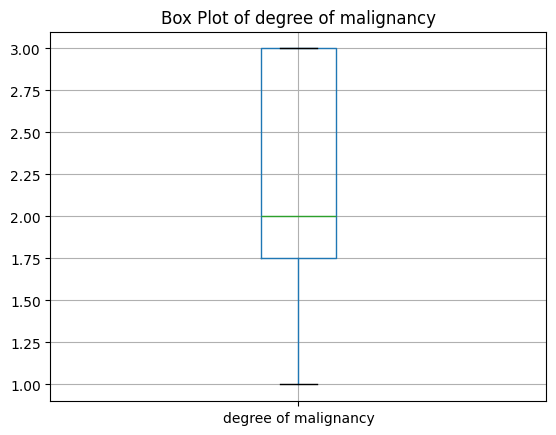

In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns for outlier analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create box plots to visualize outliers
for col in numeric_cols:
  plt.figure()
  df.boxplot(column=col)
  plt.title(f'Box Plot of {col}')
  plt.show()

In [ ]:
# Handling Outliers (Numerical Columns Only)
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    z_scores = zscore(df[col])
    df = df[(np.abs(z_scores) < 3)]  # Retain rows with z-score < 3


Summary Statistics

In [ ]:
# prompt: print summary_statistics in an organized way

def print_summary_statistics(df):
  """Prints summary statistics for a Pandas DataFrame in an organized way.

  Args:
    df: The Pandas DataFrame to analyze.
  """

  print("Summary Statistics:")
  print("-" * 20)

  # Numerical summary statistics
  print("\nNumerical Columns:")
  print(df.describe())

  # Categorical summary statistics
  print("\nCategorical Columns:")
  for column in df.select_dtypes(include=['object']).columns:
      print(f"\nColumn: {column}")
      print(f"  Unique Values: {df[column].nunique()}")
# prompt: print summary_statistics in an organized way

def print_summary_statistics(df):
  """Prints summary statistics for a Pandas DataFrame in an organized way.

  Args:
    df: The Pandas DataFrame to analyze.
  """

  print("Summary Statistics:")
  print("-" * 20)

  # Numerical summary statistics
  print("\nNumerical Columns:")
  print(df.describe())

  # Categorical summary statistics
  print("\nCategorical Columns:")
  for column in df.select_dtypes(include=['object']).columns:
      print(f"\nColumn: {column}")
      print(f"  Unique Values: {df[column].nunique()}")
      print(f"  Most Frequent Value: {df[column].mode()[0]}")
      print(f"  Frequency of Most Frequent Value: {df[column].value_counts().iloc[0]}")
      print(f"  Count: {df[column].count()}")
print_summary_statistics(df)


Summary Statistics:
--------------------

Numerical Columns:
       degree of malignancy
count            244.000000
mean               2.040984
std                0.735883
min                1.000000
25%                1.750000
50%                2.000000
75%                3.000000
max                3.000000

Categorical Columns:

Column: age range
  Unique Values: 6
  Most Frequent Value: 50-59
  Frequency of Most Frequent Value: 82
  Count: 244

Column: menopausal status
  Unique Values: 3
  Most Frequent Value: premeno
  Frequency of Most Frequent Value: 129
  Count: 244

Column: invasive nodes range
  Unique Values: 11
  Most Frequent Value: 30-34
  Frequency of Most Frequent Value: 50
  Count: 244

Column: tumor size range
  Unique Values: 7
  Most Frequent Value: 0-2
  Frequency of Most Frequent Value: 188
  Count: 244

Column: node capsule status
  Unique Values: 2
  Most Frequent Value: no
  Frequency of Most Frequent Value: 201
  Count: 244

Column: breast side
  Unique Val

Visualizing data relationships


Visualizing Single Numerical Column: degree of malignancy


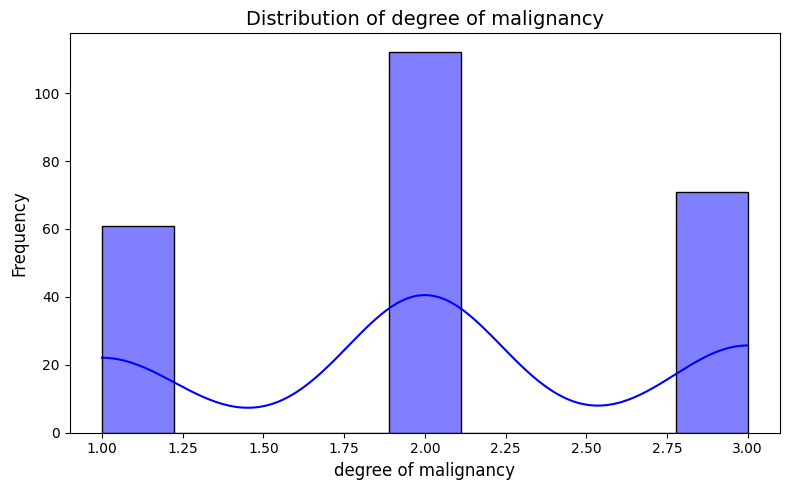

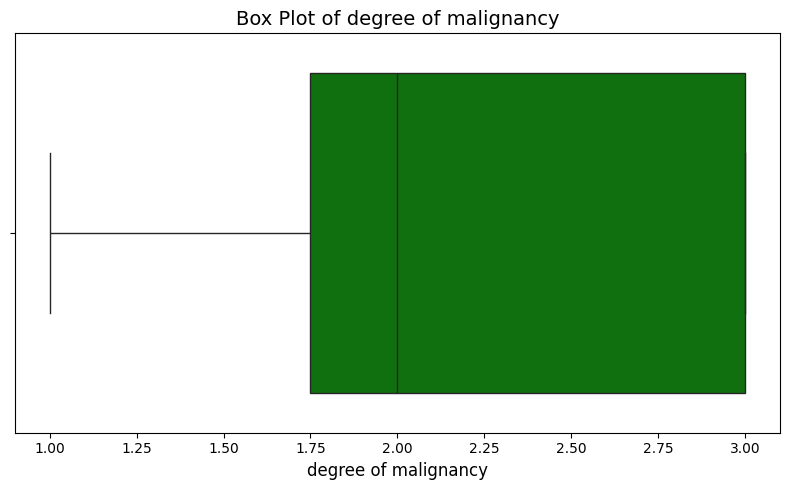

In [230]:
# Visualizing Numerical Data
numerical_cols = df.select_dtypes(include=np.number).columns

if len(numerical_cols) > 1:
    print("\nVisualizing Relationships Between Numerical Columns:")
    sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True)
    plt.show()
elif len(numerical_cols) == 1:
    single_num_col = numerical_cols[0]
    print(f"\nVisualizing Single Numerical Column: {single_num_col}")

    # Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=single_num_col, kde=True, color='blue')
    plt.title(f"Distribution of {single_num_col}", fontsize=14)
    plt.xlabel(single_num_col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.tight_layout()
    plt.show()

    # Box Plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=single_num_col, color='green')
    plt.title(f"Box Plot of {single_num_col}", fontsize=14)
    plt.xlabel(single_num_col, fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo numerical columns to visualize.")



Visualizing Categorical Data:


<ipython-input-231-3b2573ab8c3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


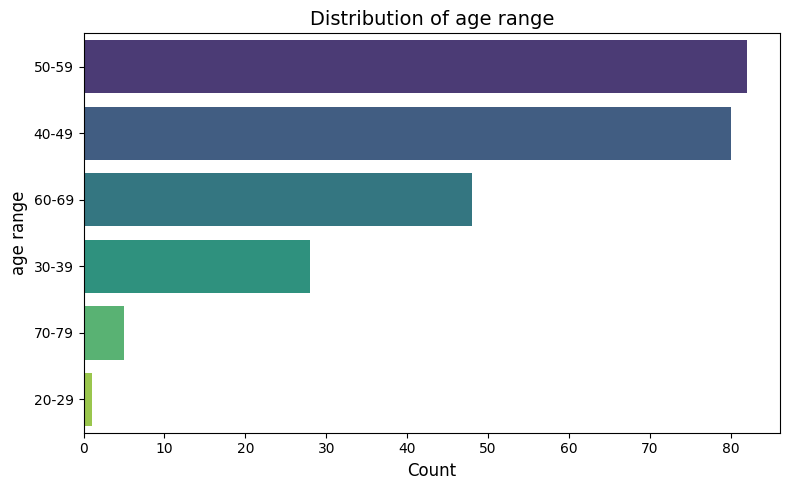

<ipython-input-231-3b2573ab8c3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


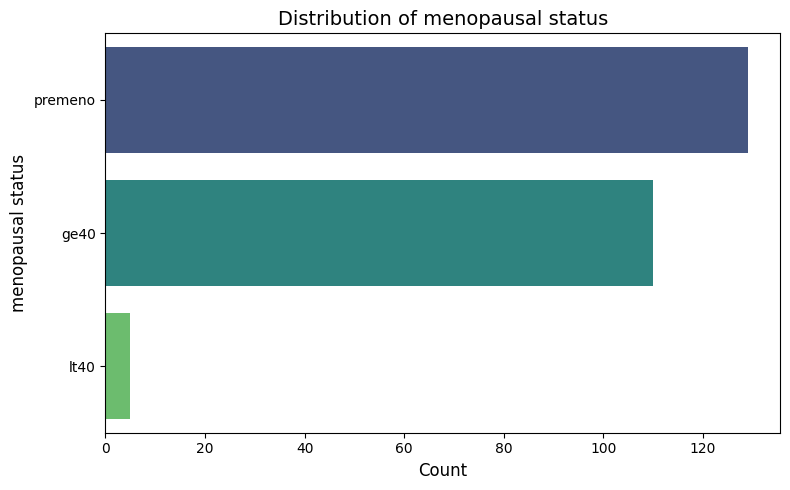

<ipython-input-231-3b2573ab8c3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


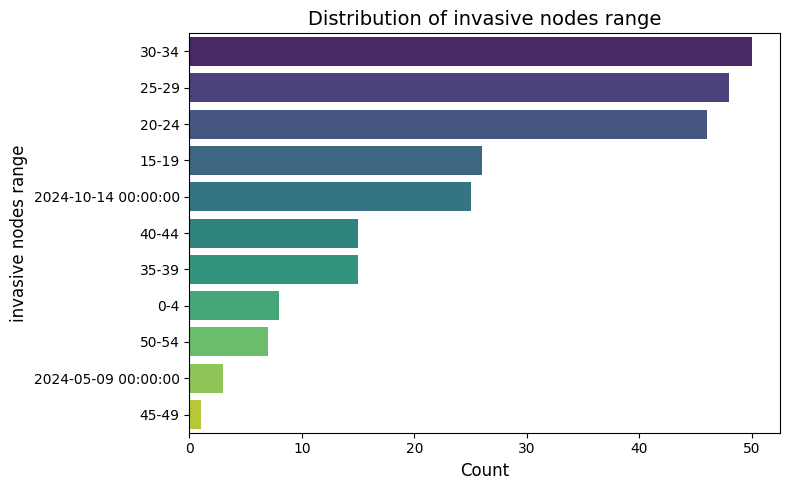

<ipython-input-231-3b2573ab8c3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


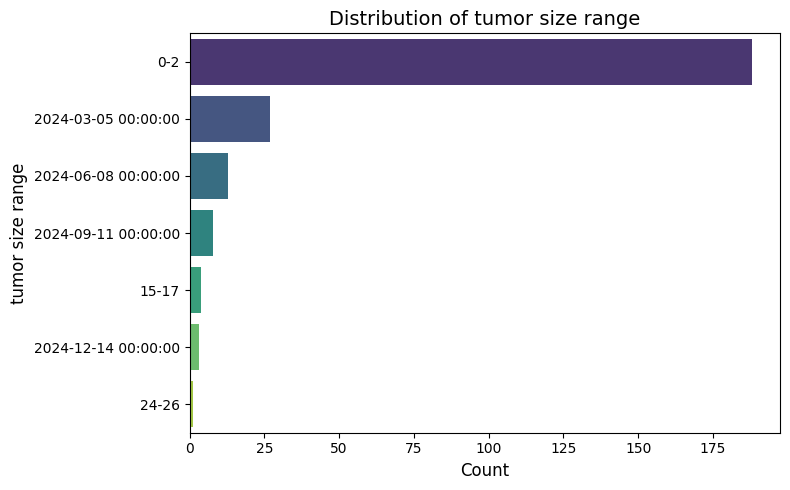

<ipython-input-231-3b2573ab8c3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


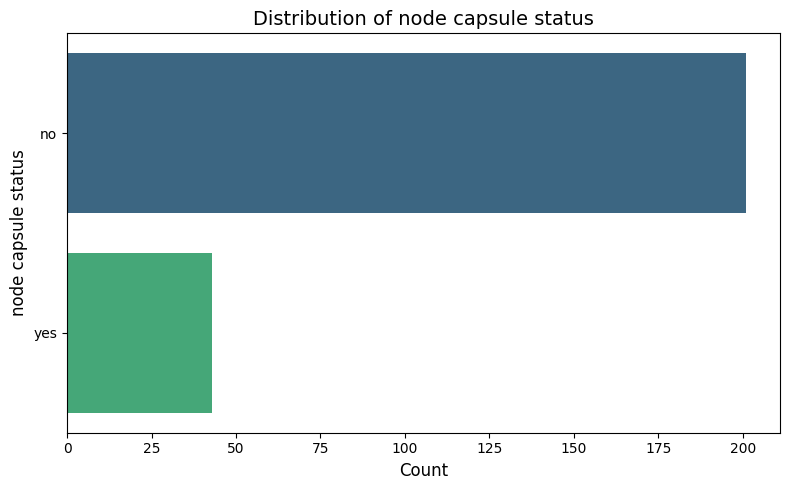

<ipython-input-231-3b2573ab8c3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


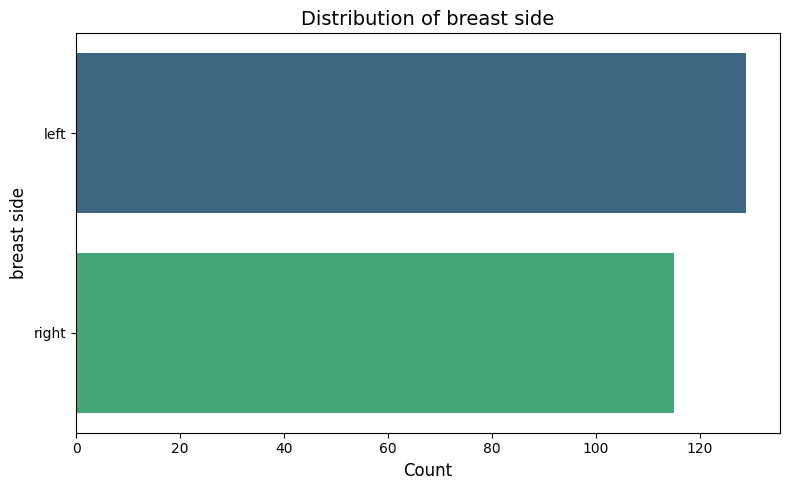

<ipython-input-231-3b2573ab8c3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


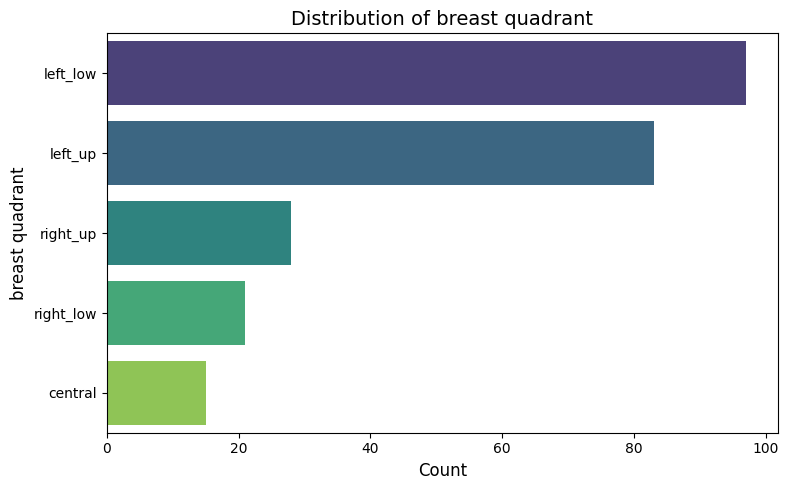

<ipython-input-231-3b2573ab8c3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


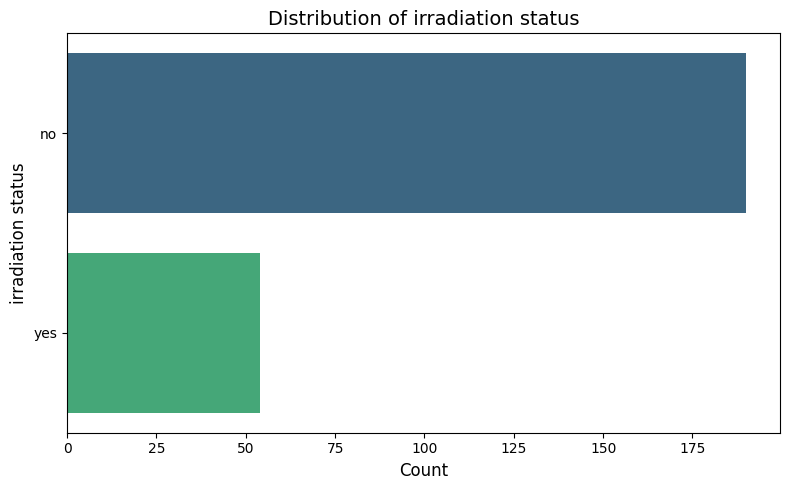

<ipython-input-231-3b2573ab8c3c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


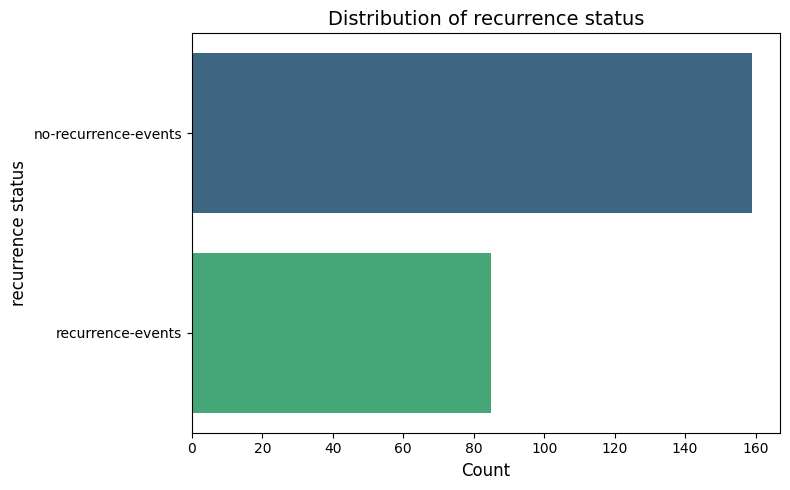

In [231]:
# Visualizing Categorical Data
categorical_cols = df.select_dtypes(include='object').columns

if len(categorical_cols) > 0:
    print("\nVisualizing Categorical Data:")
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xlabel("Count", fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.tight_layout()
        plt.show()
else:
    print("\nNo categorical columns to visualize.")

One Hot encoding

In [253]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns to encode
categorical_columns = ['age range', 'menopausal status', 'invasive nodes range', 'tumor size range',
                       'node capsule status', 'breast side', 'breast quadrant', 'irradiation status',
                       'recurrence status']

# Check if all columns exist in the DataFrame
available_columns = [col for col in categorical_columns if col in df.columns]
missing_columns = [col for col in categorical_columns if col not in df.columns]

if missing_columns:
    print(f"Warning: These columns are missing from the DataFrame and will be ignored: {missing_columns}")

# One-hot encode only available columns
if available_columns:
    # Ensure all categorical columns have consistent data types and handle missing values
    df[available_columns] = df[available_columns].astype(str).fillna('missing')

    # Set up the OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # Fit and transform the categorical columns
    encoded_data = encoder.fit_transform(df[available_columns])

    # Get the feature names for the encoded columns
    encoded_columns = encoder.get_feature_names_out(available_columns)

    # Create a DataFrame from the encoded data
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)

    # Drop the original categorical columns from the DataFrame
    data = df.drop(columns=available_columns)

    # Concatenate the original DataFrame (without categorical columns) with the encoded DataFrame
    data = pd.concat([data, encoded_df], axis=1)

# Save the preprocessed DataFrame as a .pkl file
output_path = "preprocessed_data.pkl"
data.to_pickle(output_path)
print(f"Preprocessed data saved to: {output_path}")

# Display the updated DataFrame
print(data)


Preprocessed data saved to: preprocessed_data.pkl
     degree of malignancy  age range_20-29  age range_30-39  age range_40-49  \
0                       3              0.0              1.0              0.0   
1                       2              0.0              0.0              1.0   
2                       2              0.0              0.0              1.0   
3                       2              0.0              0.0              0.0   
4                       2              0.0              0.0              1.0   
..                    ...              ...              ...              ...   
239                     2              0.0              1.0              0.0   
240                     3              0.0              1.0              0.0   
241                     1              0.0              0.0              0.0   
242                     3              0.0              0.0              1.0   
243                     3              0.0              0.0           

Checking for Redundant Columns

In [244]:
# Checking for Redundant Columns (e.g., duplicated columns)
duplicate_columns = df_encoded.columns[df_encoded.columns.duplicated()]
if len(duplicate_columns) > 0:
    print(f"\nRedundant columns found: {list(duplicate_columns)}")
    df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]
    print("Redundant columns removed.")
else:
    print("\nNo redundant columns found.")


No redundant columns found.


Check for duplicate columns

In [245]:
def check_duplicate_columns(df):

  duplicate_columns = []
  for col in df.columns:
    # Check if the current column is equal to its shifted version
    if df[col].equals(df[col].shift()):
      # If so, add the column name to the list of duplicate columns
      duplicate_columns.append(col)
  return duplicate_columns

# Create a sample DataFrame with some duplicate columns
data = {'col1': [1, 2, 3], 'col2': [1, 2, 3], 'col3': [4, 5, 6]}
df = pd.DataFrame(data)

# Call the function to check for duplicate columns
duplicate_cols = check_duplicate_columns(df)

# Print the results
if duplicate_cols:
  print("Duplicate columns found:")
  print(duplicate_cols)
else:
  print("No duplicate columns found.")

No duplicate columns found.


Dealing with multicollinearity

In [254]:
# Dealing with Multicollinearity
# Dropping features with high correlation (e.g., > 0.85)
threshold = 0.85
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

df_final = df_encoded.drop(columns=correlated_features)

print("\nFinal Dataset Shape:", df_final.shape)
print("\nFinal Dataset Preview:")
print(df_final.head())

# Save preprocessed data to a new Excel file
output_path = 'preprocessed_data.xlsx'
df_final.to_excel(output_path, index=False)
print(f"\nPreprocessed data saved to {output_path}")


Final Dataset Shape: (244, 36)

Final Dataset Preview:
   degree of malignancy  age range_20-29  age range_30-39  age range_40-49  \
0                     3                0                1                0   
1                     2                0                0                1   
2                     2                0                0                1   
3                     2                0                0                0   
4                     2                0                0                1   

   age range_50-59  age range_60-69  age range_70-79  menopausal status_ge40  \
0                0                0                0                       0   
1                0                0                0                       0   
2                0                0                0                       0   
3                0                1                0                       1   
4                0                0                0                       

Correlations and heatmap

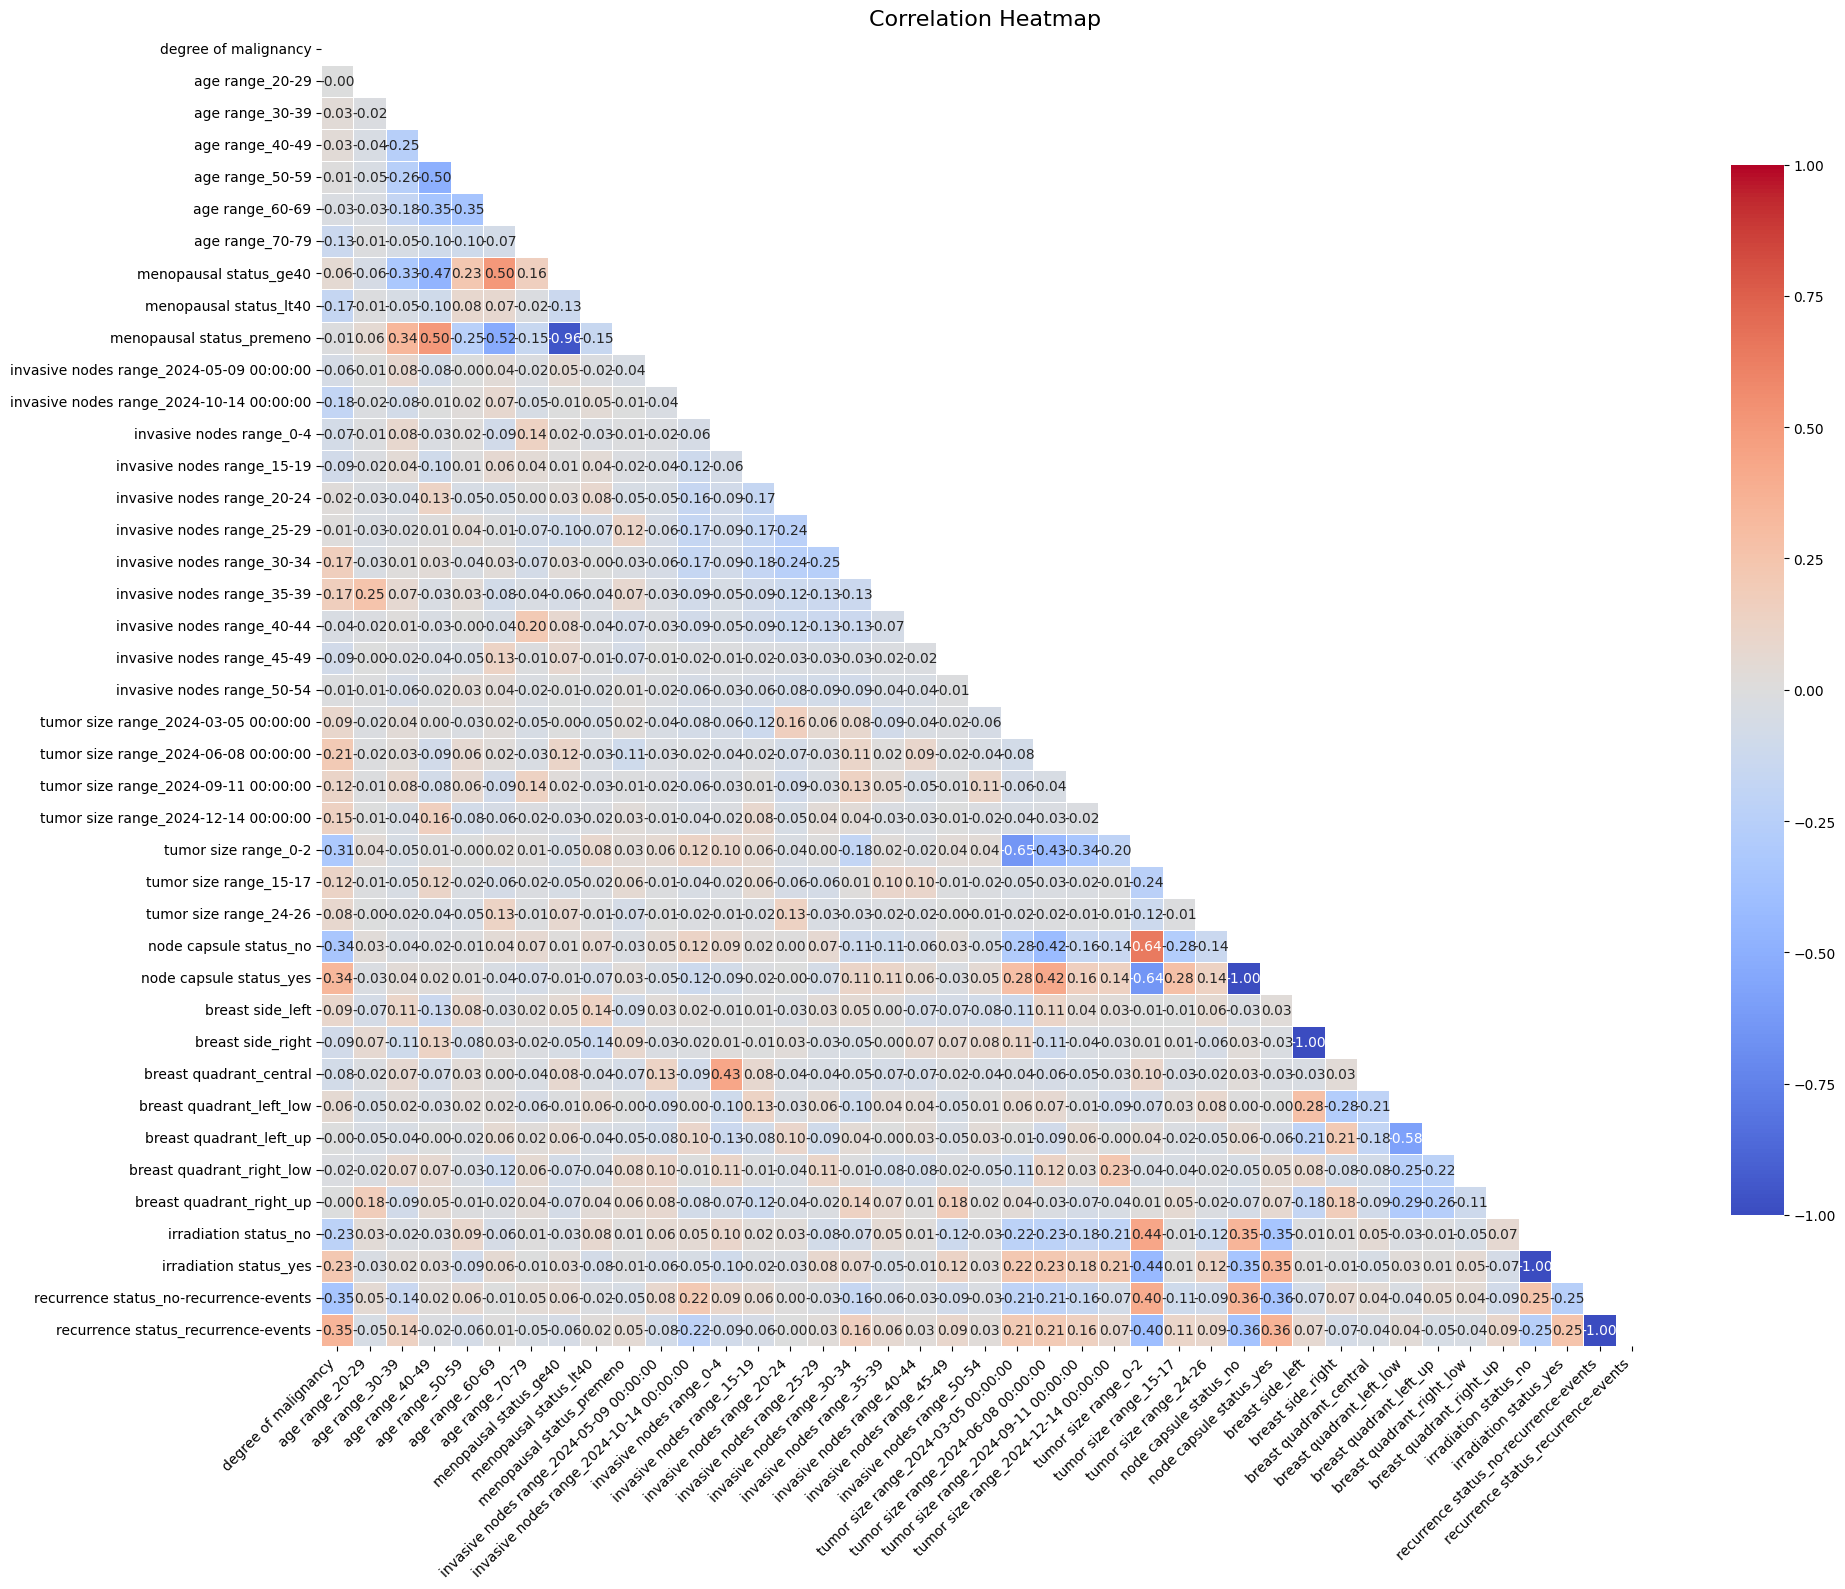

In [255]:
# Correlation and Heatmap (for numerical data)
correlation_matrix = df_encoded.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 16) ) # Adjust the size for better readability

# Draw the heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    annot=True,
    fmt=".2f",  # Limit decimal points
    linewidths=.5,
    cbar_kws={"shrink": 0.8}  # Adjust the color bar size
)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)
plt.tight_layout()  # Automatically adjust spacing
plt.show()


# Selecting a model

Orientating, cross validating, and visualizing the correlations of the models

Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating K-Nearest Neighbors...
Evaluating Support Vector Machine (SVM)...
Evaluating Logistic Regression...

Model Performance Metrics:
                          Model  Training Accuracy  Testing Accuracy  \
1             Gradient Boosting           0.897436          0.795918   
3  Support Vector Machine (SVM)           0.789744          0.755102   
4           Logistic Regression           0.774359          0.755102   
0                 Random Forest           0.969231          0.734694   
2           K-Nearest Neighbors           0.805128          0.734694   

   Training RMSE  Testing RMSE  Training MAE  Testing MAE  \
1       0.320256      0.451754      0.102564     0.204082   
3       0.458537      0.494872      0.210256     0.244898   
4       0.475017      0.494872      0.225641     0.244898   
0       0.175412      0.515079      0.030769     0.265306   
2       0.441443      0.515079      0.194872     0.265306   

 

<ipython-input-257-717947399873>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_acc_values, palette="Set2")


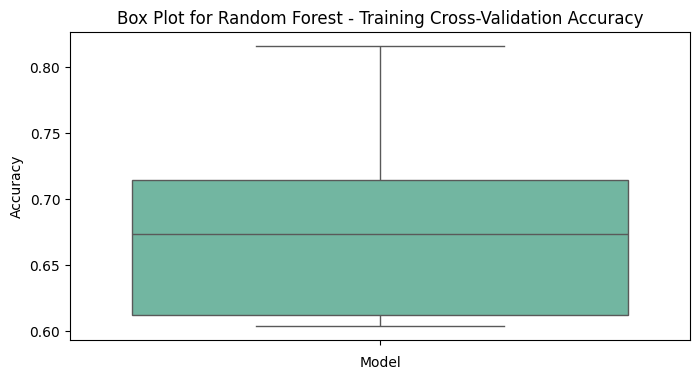

<ipython-input-257-717947399873>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_acc_values, palette="Set2")


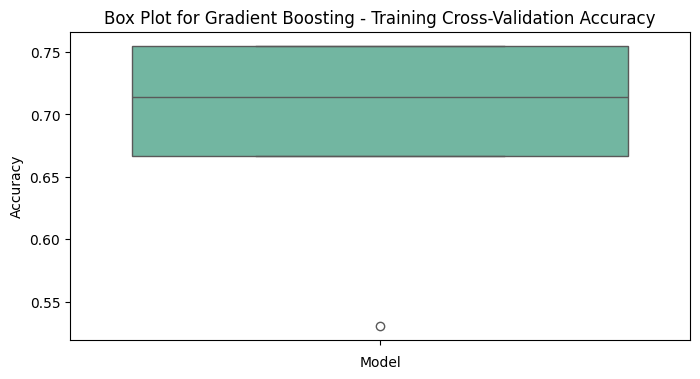

<ipython-input-257-717947399873>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_acc_values, palette="Set2")


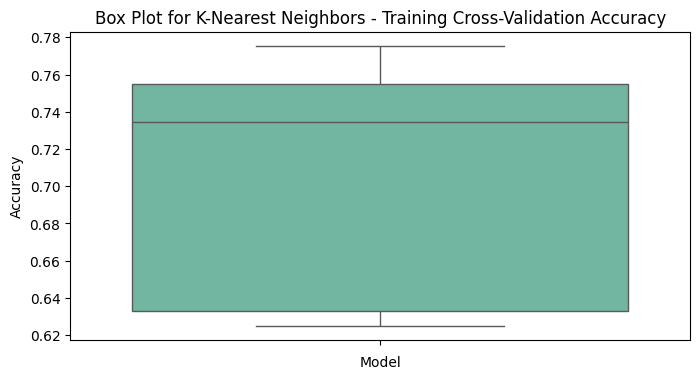

<ipython-input-257-717947399873>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_acc_values, palette="Set2")


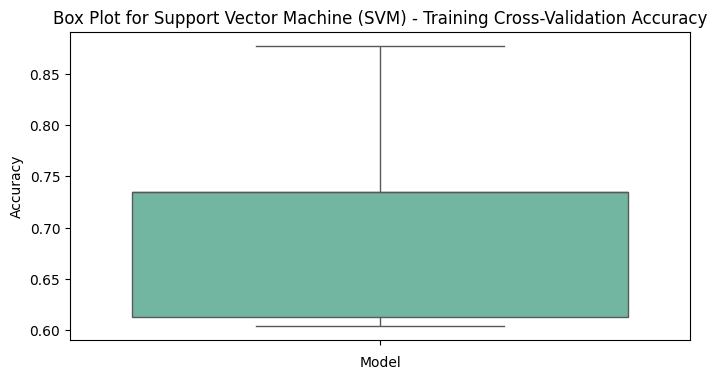

<ipython-input-257-717947399873>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_acc_values, palette="Set2")


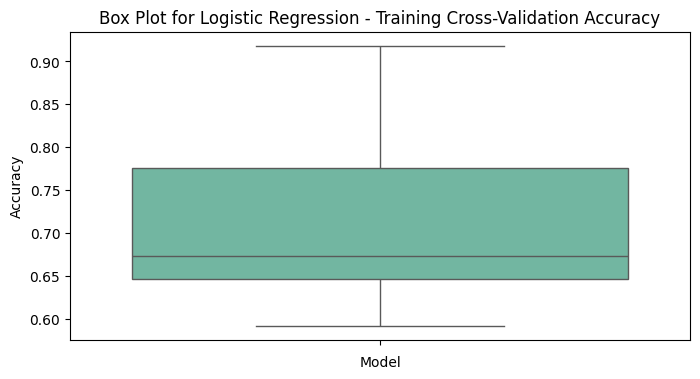

<ipython-input-257-717947399873>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")


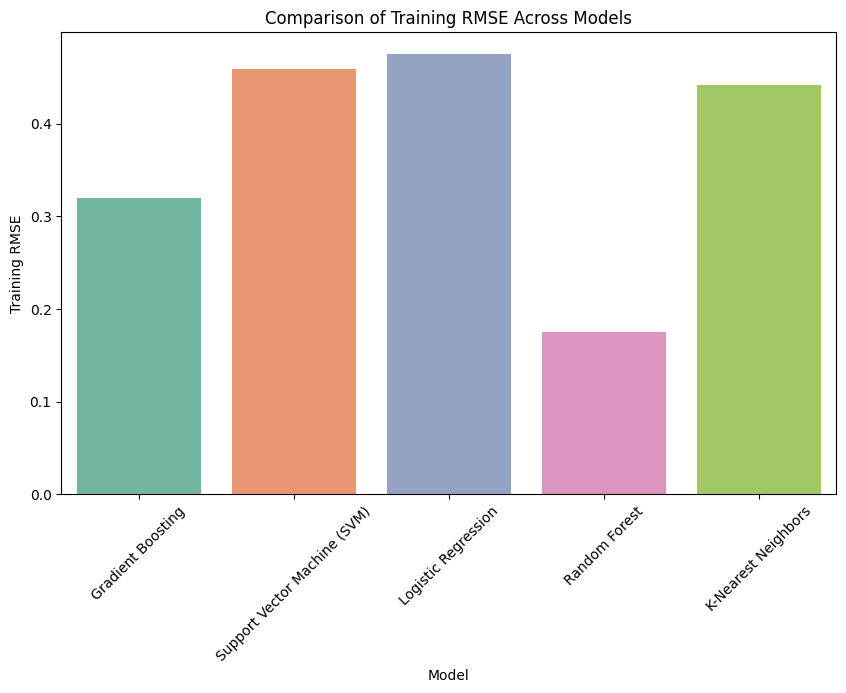

<ipython-input-257-717947399873>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")


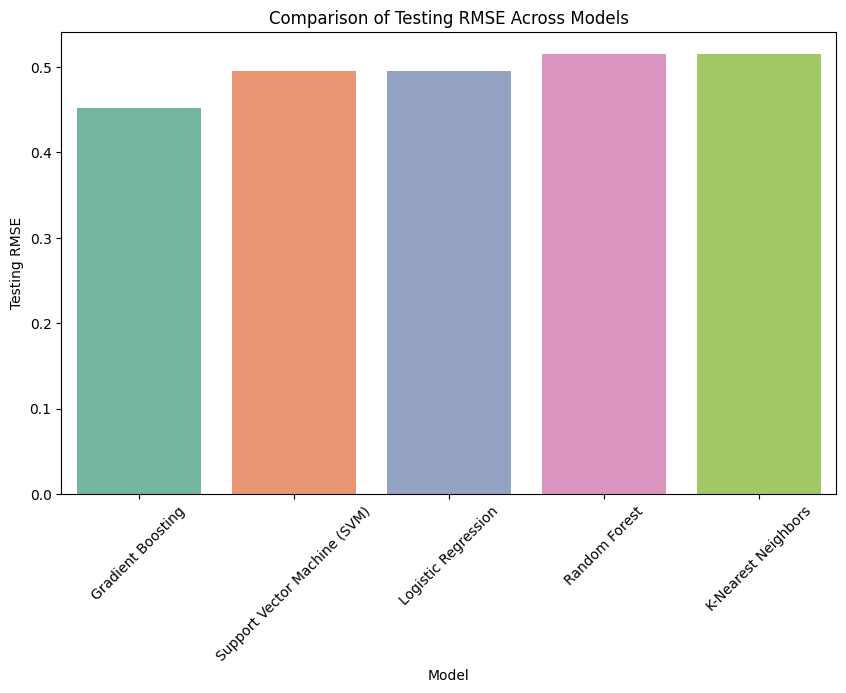

<ipython-input-257-717947399873>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")


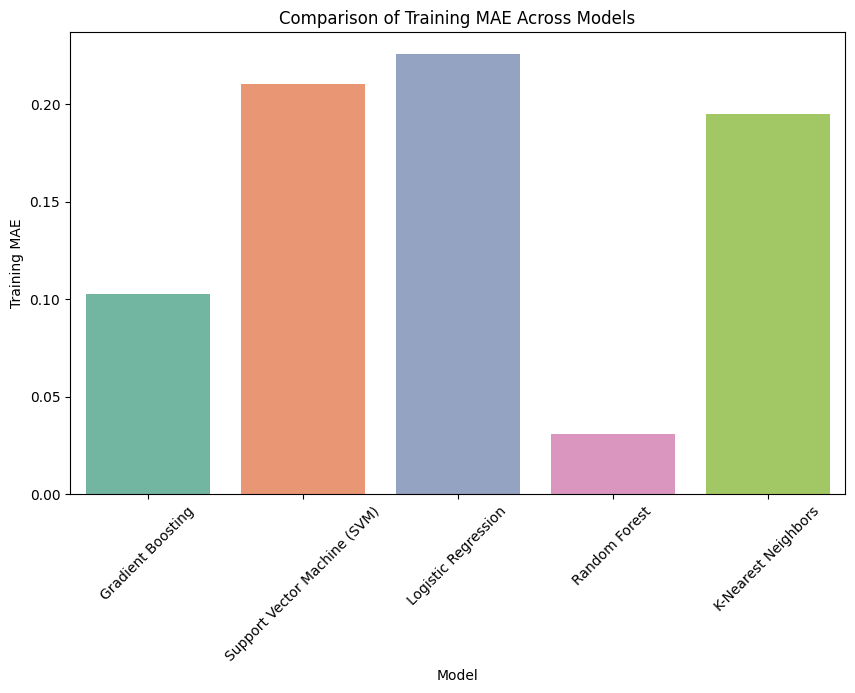

<ipython-input-257-717947399873>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")


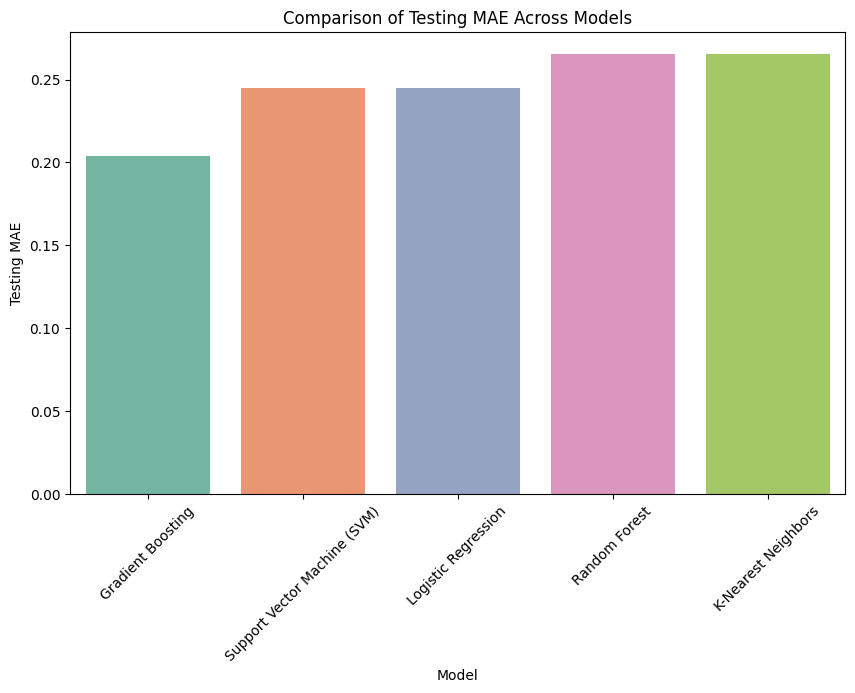


Best Model Based on Testing Accuracy: Gradient Boosting
Testing Accuracy: 0.7959
Training RMSE: 0.3203
Testing RMSE: 0.4518
Training MAE: 0.1026
Testing MAE: 0.2041


In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your dataset from an Excel file
file_path = '/content/preprocessed_data.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Define target and features
target_column = 'recurrence status_no-recurrence-events'  # Replace with the actual target column
y = df[target_column]
X = df.drop(columns=[target_column])

# Define the models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine (SVM)": SVC(),  # Replaced Naive Bayes with SVM
    "Logistic Regression": LogisticRegression()
}

# Initialize lists to store results
results = []
train_results = []
test_results = []

# Loop through each model
for name, model in models.items():
    print(f"Evaluating {name}...")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform cross-validation for training accuracy
    cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Cross-validation accuracy

    # Fit the model
    model.fit(X_train, y_train)

    # Predict for training and testing
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate training and testing accuracy
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    # Calculate RMSE and MAE for training and testing
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Store results in a dictionary
    results.append({
        "Model": name,
        "Training Accuracy": train_accuracy,
        "Testing Accuracy": test_accuracy,
        "Training RMSE": train_rmse,
        "Testing RMSE": test_rmse,
        "Training MAE": train_mae,
        "Testing MAE": test_mae,
        "Cross-Validation Accuracy": cross_val_scores.mean()
    })

    # Store training and testing accuracy for box plots
    train_results.append({
        "Model": name,
        "Training Accuracy": cross_val_scores  # Store all cross-validation scores for plotting
    })
    test_results.append({
        "Model": name,
        "Testing Accuracy": test_accuracy
    })

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display the results sorted by Testing Accuracy
results_df = results_df.sort_values(by="Testing Accuracy", ascending=False)
print("\nModel Performance Metrics:")
print(results_df)

# Create box plots for Training Cross-Validation Accuracy
train_results_df = pd.DataFrame(train_results)
test_results_df = pd.DataFrame(test_results)

for model_name in models.keys():
    # Extract training accuracy values for the specific model
    train_acc_values = train_results_df[train_results_df["Model"] == model_name]["Training Accuracy"].values[0]

    # Plot Training Accuracy for each model
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_acc_values, palette="Set2")
    plt.title(f'Box Plot for {model_name} - Training Cross-Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')
    plt.show()

# Plot results for Training and Testing RMSE/MAE
metrics = ["Training RMSE", "Testing RMSE", "Training MAE", "Testing MAE"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")
    plt.title(f"Comparison of {metric} Across Models")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.show()

# Print the best model based on Testing Accuracy
best_model_row = results_df.iloc[0]
print(f"\nBest Model Based on Testing Accuracy: {best_model_row['Model']}")
print(f"Testing Accuracy: {best_model_row['Testing Accuracy']:.4f}")
print(f"Training RMSE: {best_model_row['Training RMSE']:.4f}")
print(f"Testing RMSE: {best_model_row['Testing RMSE']:.4f}")
print(f"Training MAE: {best_model_row['Training MAE']:.4f}")
print(f"Testing MAE: {best_model_row['Testing MAE']:.4f}")


# Hyperparameter Tuning

Grid search

Performing Grid Search for Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Performing Grid Search for Gradient Boosting...
Performing Grid Search for Linear Regression...
Performing Grid Search for Support Vector Machine (SVM)...
Performing Grid Search for K-Nearest Neighbors (KNN)...

Model Performance Metrics:
                          Model  \
3  Support Vector Machine (SVM)   
0                 Random Forest   
1             Gradient Boosting   
4     K-Nearest Neighbors (KNN)   
2             Linear Regression   

                                         Best Params  Training R^2  \
3     {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}      0.331376   
0  {'max_depth': 20, 'max_features': 'sqrt', 'min...      0.369308   
1  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...      0.213111   
4  {'metric': 'minkowski', 'n_neighbors': 9, 'wei...      0.296487   
2                           {'fit_intercept': False}      0.342431   

   Testing R^2  Training RMSE  Testing RMSE  Training MAE  Testing MAE  
3     0.203578       0.392248      0.411302      0.27244

<ipython-input-259-b209b8996ef4>:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")


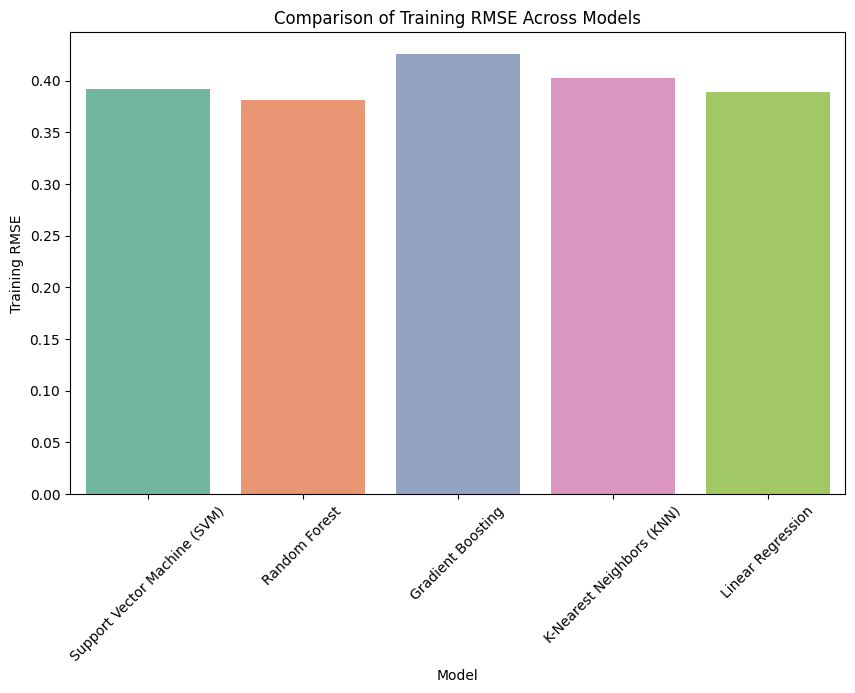

<ipython-input-259-b209b8996ef4>:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")


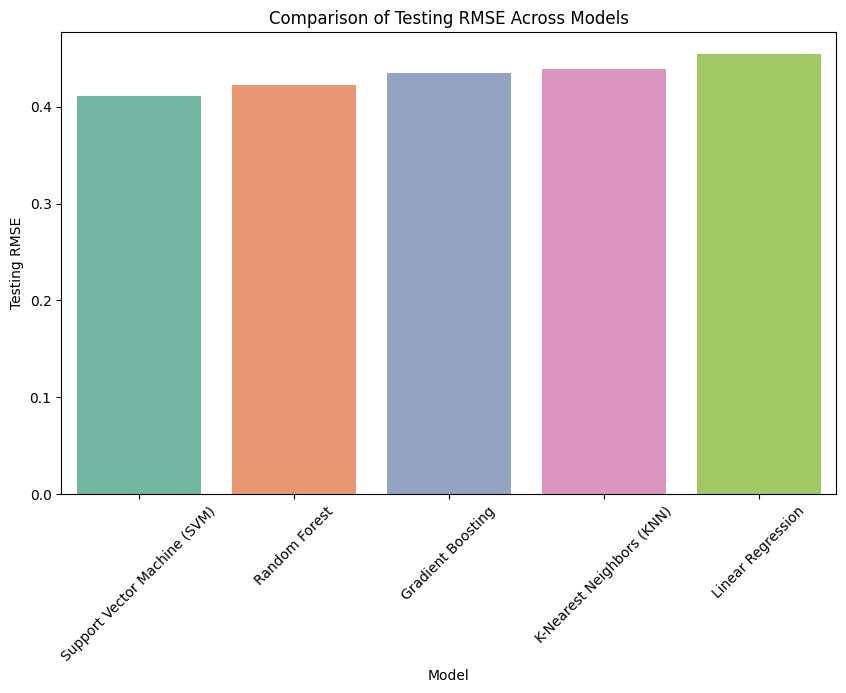

<ipython-input-259-b209b8996ef4>:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")


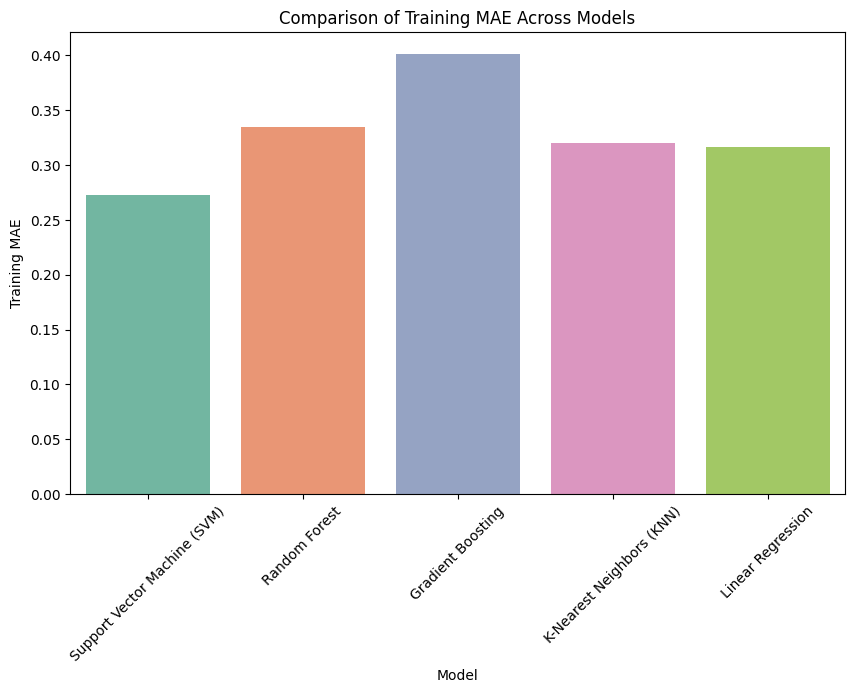

<ipython-input-259-b209b8996ef4>:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")


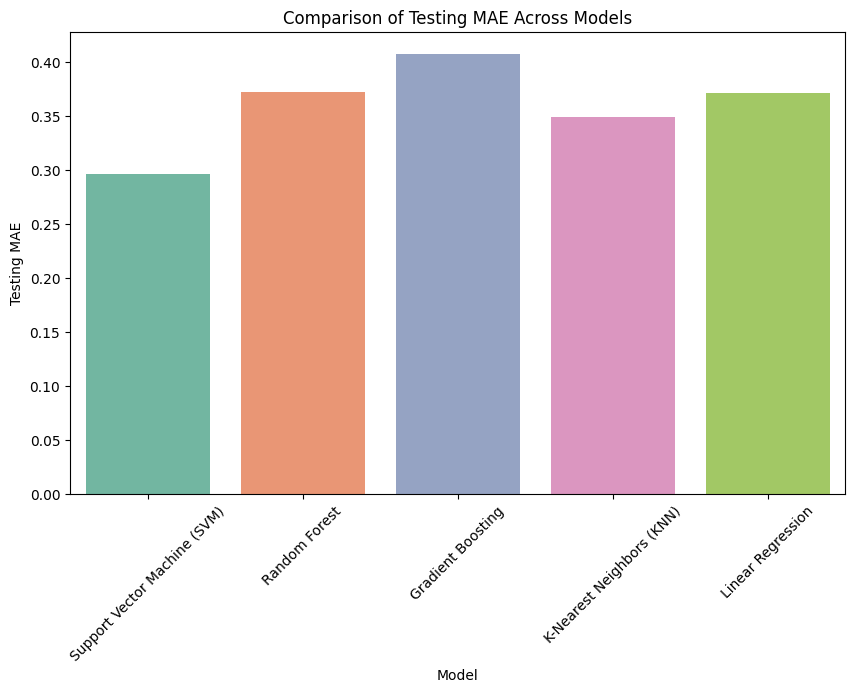


Best Model Based on Testing R^2: Support Vector Machine (SVM)
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Testing R^2: 0.2036
Testing RMSE: 0.4113
Testing MAE: 0.2963


In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors Regressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models with their corresponding hyperparameter grids
models_with_params = {
    "Random Forest": {
        "model": RandomForestRegressor(),
        "params": {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(),
        "params": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0]
        }
    },
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {
            'fit_intercept': [True, False]
        }
    },
    "Support Vector Machine (SVM)": {
        "model": SVR(),
        "params": {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    },
    "K-Nearest Neighbors (KNN)": {
        "model": KNeighborsRegressor(),
        "params": {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean']
        }
    }
}

# Assume that X (features) and y (target) have been defined before
# X, y = your_data.drop('target_column', axis=1), your_data['target_column']

# Initialize a list to store results
results = []

# Loop through each model and perform grid search
for name, config in models_with_params.items():
    print(f"Performing Grid Search for {name}...")

    # Perform grid search
    grid_search = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        scoring='r2',  # You can change this if you prefer other metrics
        cv=5,
        n_jobs=-1
    )

    # Fit the grid search
    grid_search.fit(X, y)

    # Best model from grid search
    best_model = grid_search.best_estimator_

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and predict with the best model
    best_model.fit(X_train, y_train)
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Append results
    results.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "Training R^2": train_r2,
        "Testing R^2": test_r2,
        "Training RMSE": train_rmse,
        "Testing RMSE": test_rmse,
        "Training MAE": train_mae,
        "Testing MAE": test_mae
    })

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display the results sorted by Testing R^2
results_df = results_df.sort_values(by="Testing R^2", ascending=False)
print("\nModel Performance Metrics:")
print(results_df)

# Plot results for Training and Testing RMSE/MAE
metrics = ["Training RMSE", "Testing RMSE", "Training MAE", "Testing MAE"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x="Model", y=metric, palette="Set2")
    plt.title(f"Comparison of {metric} Across Models")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.show()

# Print the best model based on Testing R^2
best_model_row = results_df.iloc[0]
print(f"\nBest Model Based on Testing R^2: {best_model_row['Model']}")
print(f"Best Params: {best_model_row['Best Params']}")
print(f"Testing R^2: {best_model_row['Testing R^2']:.4f}")
print(f"Testing RMSE: {best_model_row['Testing RMSE']:.4f}")
print(f"Testing MAE: {best_model_row['Testing MAE']:.4f}")


Random Search

In [260]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR  # Importing Support Vector Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define the models to be used in the random search
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine (SVM)": SVR(),  # Replaced Naive Bayes with SVM
    "Linear Regression": LinearRegression()
}

# Define hyperparameter grids for each model
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean']
    },
    "Support Vector Machine (SVM)": {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # SVM kernel types
        'C': [0.1, 1, 10],  # Regularization parameter
        'gamma': ['scale', 'auto']  # Kernel coefficient
    },
    "Linear Regression": {
        'fit_intercept': [True, False]
    }
}

# Initialize an empty dictionary to store the results
search_results = {}

# Custom scoring function for R², MAE, and RMSE
def custom_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return {"r2": r2, "mae": mae, "rmse": rmse}

# Perform Random Search for each model
for model_name, model in models.items():
    print(f"Performing Random Search for {model_name}...")

    # Initialize RandomizedSearchCV with model and hyperparameter grid
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=10,  # Number of random combinations to try
        cv=5,  # Number of folds for cross-validation
        random_state=42,
        n_jobs=-1,  # Use all available processors
        verbose=1,
        scoring=custom_scorer,  # Use the custom scoring function
        refit='r2'  # Explicitly set the refit metric to 'r2'
    )

    # Fit the random search model (Assuming X_train and y_train are already defined)
    random_search.fit(X_train, y_train)

    # Store the best model and the best score
    best_model = random_search.best_estimator_
    best_score = random_search.best_score_

    # Get the best hyperparameters
    best_params = random_search.best_params_

    print(f"Best Score for {model_name}: {best_score:.4f}")
    print(f"Best Hyperparameters for {model_name}: {best_params}")

    # Save the results for further analysis
    search_results[model_name] = {
        "Best Score": best_score,
        "Best Parameters": best_params,
        "Best Model": best_model
    }

# Evaluate models on test data
for model_name, results in search_results.items():
    print(f"\nEvaluating {model_name} on test data...")
    best_model = results["Best Model"]
    y_pred = best_model.predict(X_test)

    # Compute R², MAE, and RMSE for test data
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Test R² for {model_name}: {test_r2:.4f}")
    print(f"Test MAE for {model_name}: {test_mae:.4f}")
    print(f"Test RMSE for {model_name}: {test_rmse:.4f}")

# Optionally, you can save the results to a DataFrame for better visualization
results_df = pd.DataFrame(search_results).T
print("\nRandom Search Results Summary:")
print(results_df)


Performing Random Search for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Best Score for Random Forest: 0.1718
Best Hyperparameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30}
Performing Random Search for Gradient Boosting...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score for Gradient Boosting: 0.1382
Best Hyperparameters for Gradient Boosting: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
Performing Random Search for K-Nearest Neighbors...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score for K-Nearest Neighbors: 0.1171
Best Hyperparameters for K-Nearest Neighbors: {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'euclidean'}
Performing Random Search for Support Vector Machine (SVM)...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score for Support Vector Machine (SVM): 0.1538
Best Hyperparameters for Support Vector Machine (SVM): {'kernel': 'poly', 'gamma': 'scale', 'C': 0.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


                             Best Score  \
Random Forest                  0.171777   
Gradient Boosting              0.138171   
K-Nearest Neighbors            0.117081   
Support Vector Machine (SVM)   0.153848   
Linear Regression             -0.070894   

                                                                Best Parameters  \
Random Forest                 {'n_estimators': 50, 'min_samples_split': 5, '...   
Gradient Boosting             {'subsample': 0.9, 'n_estimators': 100, 'max_d...   
K-Nearest Neighbors           {'weights': 'uniform', 'n_neighbors': 9, 'metr...   
Support Vector Machine (SVM)     {'kernel': 'poly', 'gamma': 'scale', 'C': 0.1}   
Linear Regression                                      {'fit_intercept': False}   

                                                                     Best Model  
Random Forest                 (DecisionTreeRegressor(max_depth=30, max_featu...  
Gradient Boosting             ([DecisionTreeRegressor(criterion='friedman_ms..

Bayesian Optimization

In [261]:
!pip install scikit-optimize

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR  # Import SVR for Support Vector Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from skopt import gp_minimize
from skopt.space import Integer, Real, Categorical
from skopt.utils import use_named_args

from sklearn.datasets import load_diabetes

# Load the dataset (you can replace this with your dataset if needed)
data = load_diabetes()
X = data.data
y = data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their respective hyperparameter spaces
models = {
    "Random Forest": (
    RandomForestRegressor(random_state=42),
    [
        Integer(50, 300, name='n_estimators'),
        Integer(5, 50, name='max_depth'),
        Integer(2, 20, name='min_samples_split'),
        Integer(1, 20, name='min_samples_leaf'),
        Categorical([None, 'sqrt', 'log2'], name='max_features')  # Replace 'auto' with None
    ]
),

    "Gradient Boosting": (
        GradientBoostingRegressor(random_state=42),
        [
            Integer(50, 300, name='n_estimators'),
            Real(0.01, 0.2, name='learning_rate'),
            Integer(3, 10, name='max_depth'),
            Real(0.7, 1.0, name='subsample')
        ]
    ),
    "K-Nearest Neighbors": (
        KNeighborsRegressor(),
        [
            Integer(3, 20, name='n_neighbors'),
            Categorical(['uniform', 'distance'], name='weights'),
            Categorical(['minkowski', 'euclidean'], name='metric')
        ]
    ),
    "Linear Regression": (
        LinearRegression(),
        [
            Categorical([True, False], name='fit_intercept')
        ]
    ),
    "SVM (SVR)": (  # SVM model for regression
        SVR(),
        [
            Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'),
            Real(1e-3, 1e3, prior='log-uniform', name='C'),  # Regularization parameter
            Real(1e-3, 1e3, prior='log-uniform', name='epsilon')  # Epsilon parameter
        ]
    )
}

# Initialize an empty dictionary to store the results
bayes_results = {}

# Function to optimize a model using Bayesian Optimization
def optimize_model(model, param_space, X_train, y_train):
    @use_named_args(param_space)
    def objective(**params):
        model.set_params(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        return -r2_score(y_train, y_pred)  # Negative R² as the objective to minimize

    # Perform Bayesian Optimization
    res = gp_minimize(
        func=objective,
        dimensions=param_space,
        n_calls=25,  # Number of optimization steps
        random_state=42
    )
    return res

# Perform Bayesian Optimization for each model
for model_name, (model, param_space) in models.items():
    print(f"Optimizing {model_name}...")
    try:
        result = optimize_model(model, param_space, X_train, y_train)
        best_params = {dim.name: val for dim, val in zip(param_space, result.x)}
        best_score = -result.fun

        # Fit the model with the best parameters on training data
        model.set_params(**best_params)
        model.fit(X_train, y_train)

        # Save the results
        bayes_results[model_name] = {
            "Best Score": best_score,
            "Best Parameters": best_params,
            "Best Model": model
        }

        print(f"Best Score for {model_name}: {best_score:.4f}")
        print(f"Best Parameters for {model_name}: {best_params}")

    except Exception as e:
        print(f"Error with {model_name}: {e}")

# Evaluate models on test data
for model_name, results in bayes_results.items():
    print(f"\nEvaluating {model_name} on test data...")
    best_model = results["Best Model"]
    y_pred = best_model.predict(X_test)

    # Compute R², MAE, and RMSE for test data
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Test R² for {model_name}: {test_r2:.4f}")
    print(f"Test MAE for {model_name}: {test_mae:.4f}")
    print(f"Test RMSE for {model_name}: {test_rmse:.4f}")

# Optionally, you can save the results to a DataFrame for better visualization
results_df = pd.DataFrame(bayes_results).T
print("\nBayesian Optimization Results Summary:")
print(results_df)


Optimizing Random Forest...


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [300, 32, 2, 1, 'sqrt'] before, using random point [288, 48, 11, 3, None]
  warnings.warn(


Best Score for Random Forest: 0.9247
Best Parameters for Random Forest: {'n_estimators': 204, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Optimizing Gradient Boosting...
Best Score for Gradient Boosting: 1.0000
Best Parameters for Gradient Boosting: {'n_estimators': 300, 'learning_rate': 0.2, 'max_depth': 10, 'subsample': 1.0}
Optimizing K-Nearest Neighbors...


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 'distance', 'euclidean'] before, using random point [17, 'distance', 'minkowski']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 'distance', 'euclidean'] before, using random point [5, 'distance', 'euclidean']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 'distance', 'euclidean'] before, using random point [7, 'uniform', 'minkowski']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 'distance', 'euclidean'] before, using random point [18, 'uniform', 'minkowski']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517

Best Score for K-Nearest Neighbors: 1.0000
Best Parameters for K-Nearest Neighbors: {'n_neighbors': 13, 'weights': 'distance', 'metric': 'minkowski'}
Optimizing Linear Regression...


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True] before, using random point [False]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True] before, using random point [False]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True] before, using random point [False]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True] before, using random point [False]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [True] before, using random point [True]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optim

Best Score for Linear Regression: 0.5279
Best Parameters for Linear Regression: {'fit_intercept': True}
Optimizing SVM (SVR)...
Best Score for SVM (SVR): 0.8360
Best Parameters for SVM (SVR): {'kernel': 'rbf', 'C': 1000.0, 'epsilon': 7.192209592937488}

Evaluating Random Forest on test data...
Test R² for Random Forest: 0.4551
Test MAE for Random Forest: 43.4527
Test RMSE for Random Forest: 53.7315

Evaluating Gradient Boosting on test data...
Test R² for Gradient Boosting: 0.3209
Test MAE for Gradient Boosting: 48.4004
Test RMSE for Gradient Boosting: 59.9852

Evaluating K-Nearest Neighbors on test data...
Test R² for K-Nearest Neighbors: 0.4401
Test MAE for K-Nearest Neighbors: 44.2000
Test RMSE for K-Nearest Neighbors: 54.4657

Evaluating Linear Regression on test data...
Test R² for Linear Regression: 0.4526
Test MAE for Linear Regression: 42.7941
Test RMSE for Linear Regression: 53.8534

Evaluating SVM (SVR) on test data...
Test R² for SVM (SVR): 0.2143
Test MAE for SVM (SVR): 47.

Contour plot

Generating contour plots for Random Forest...


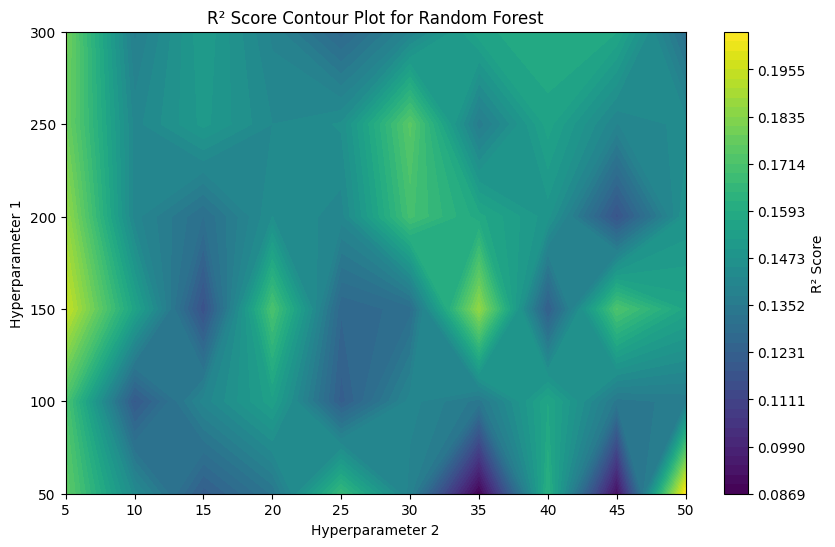

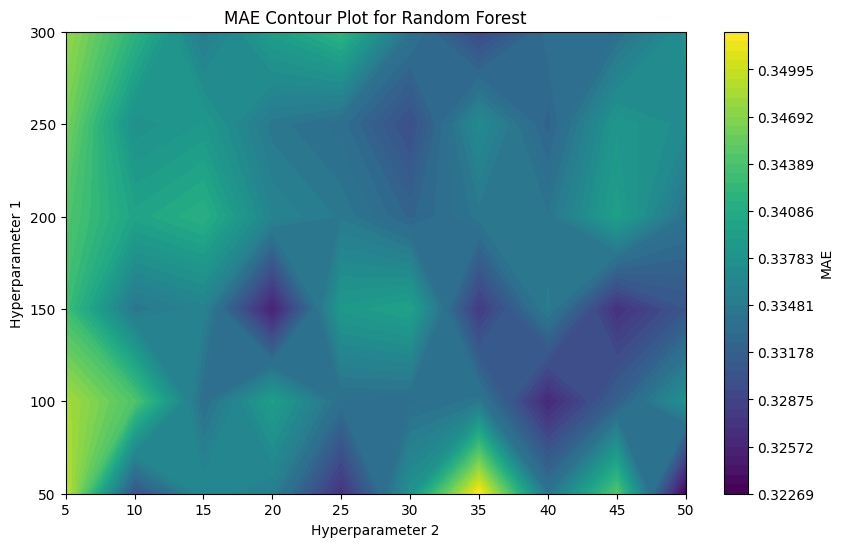

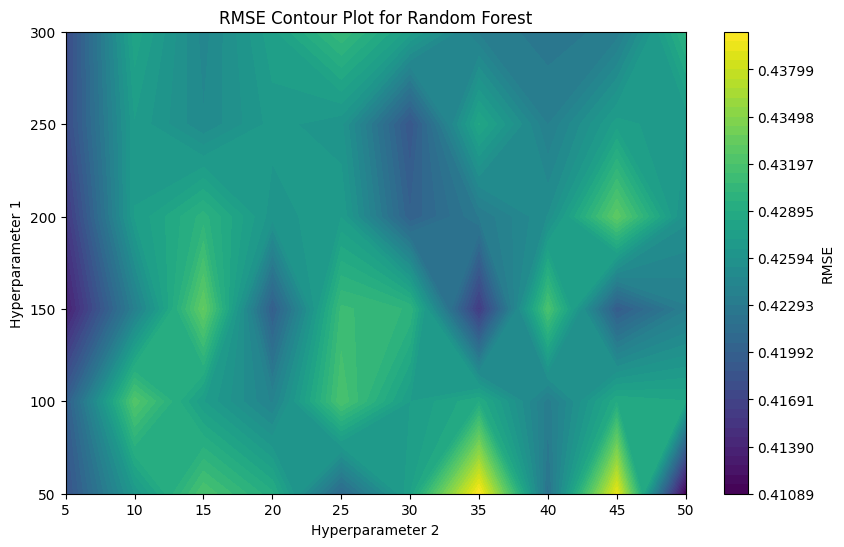

Generating contour plots for Gradient Boosting...


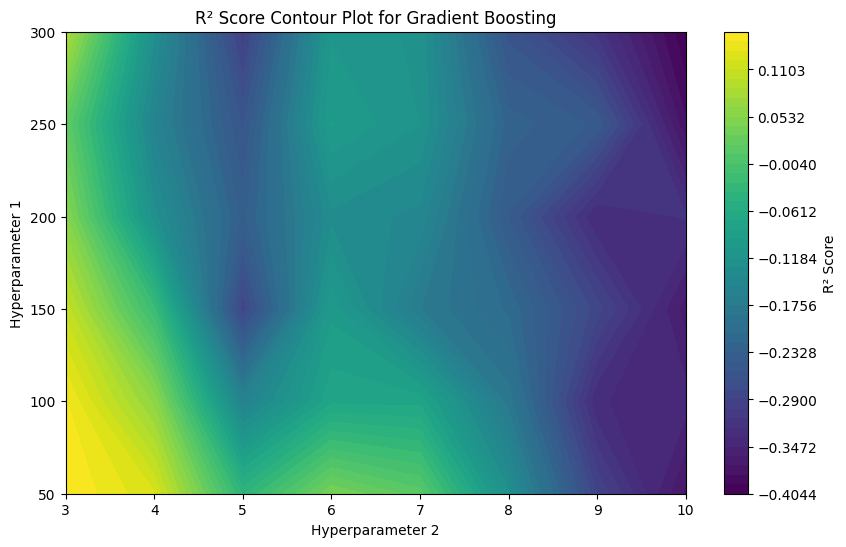

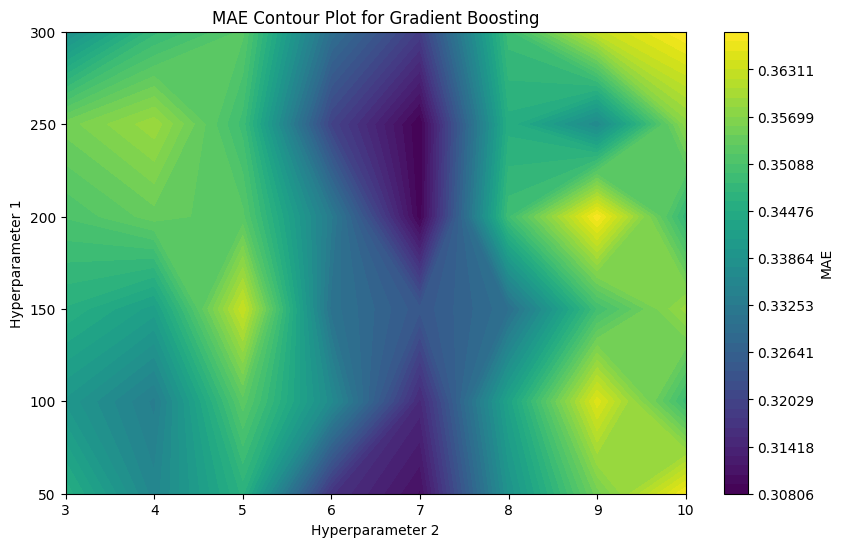

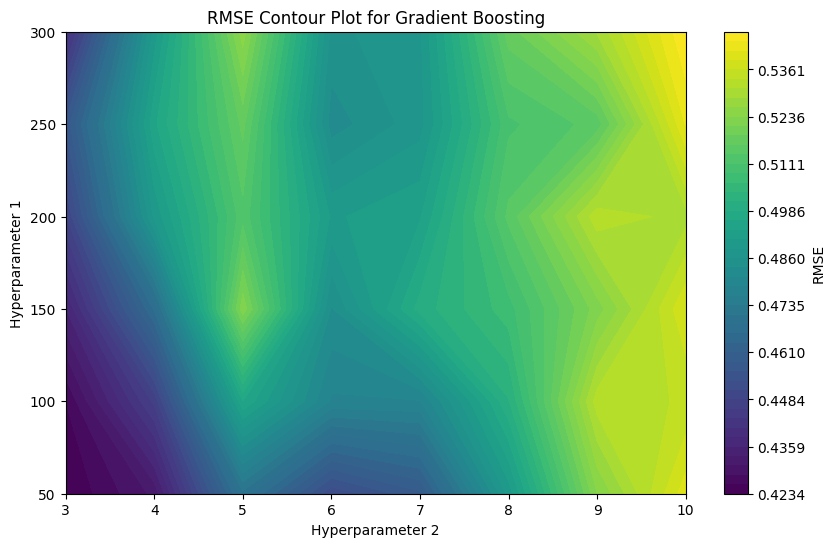

Generating contour plots for K-Nearest Neighbors...


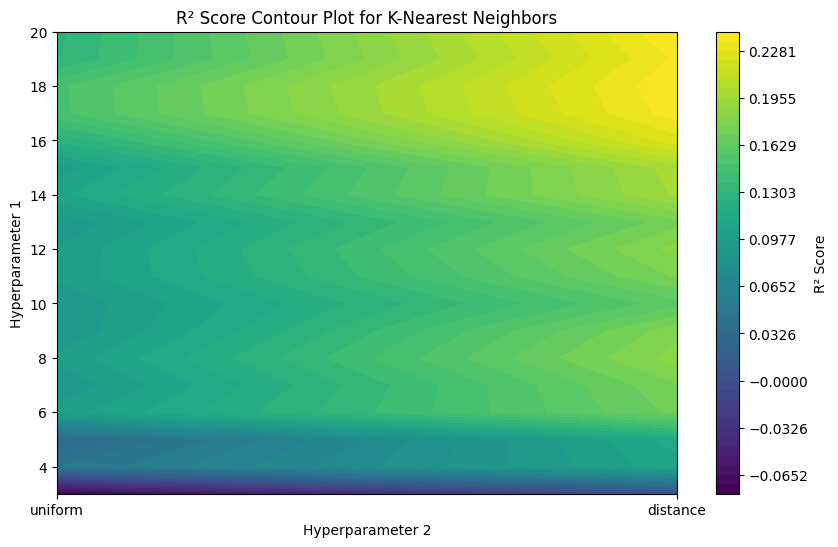

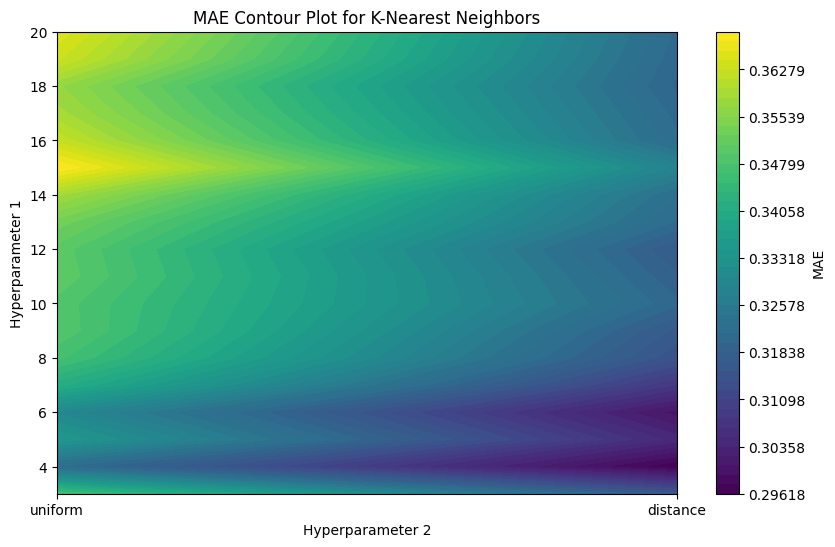

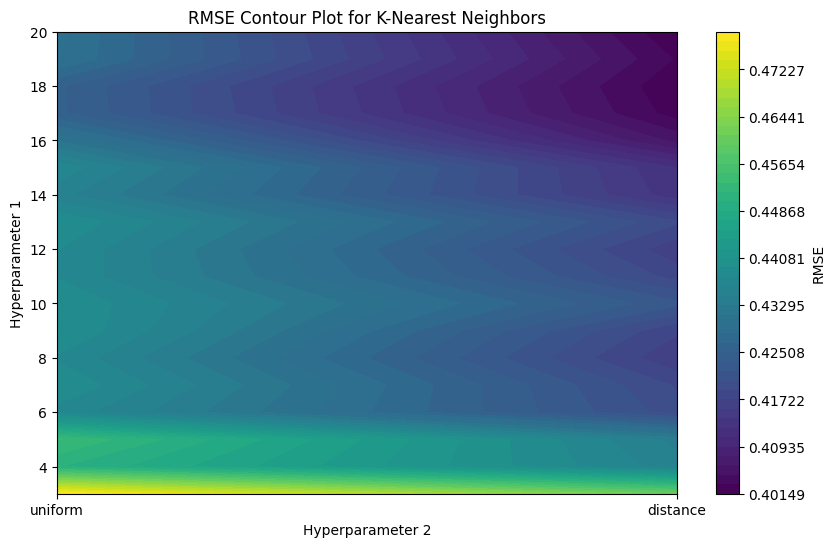

Generating contour plots for SVM...


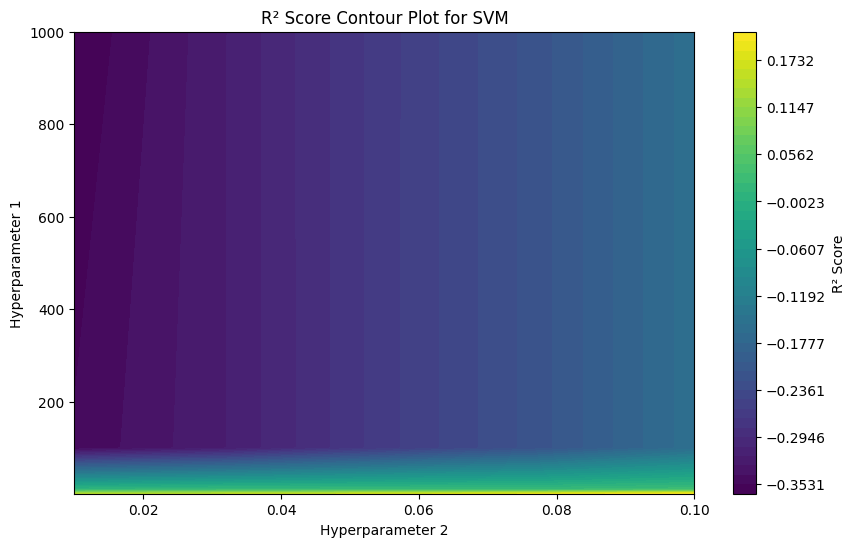

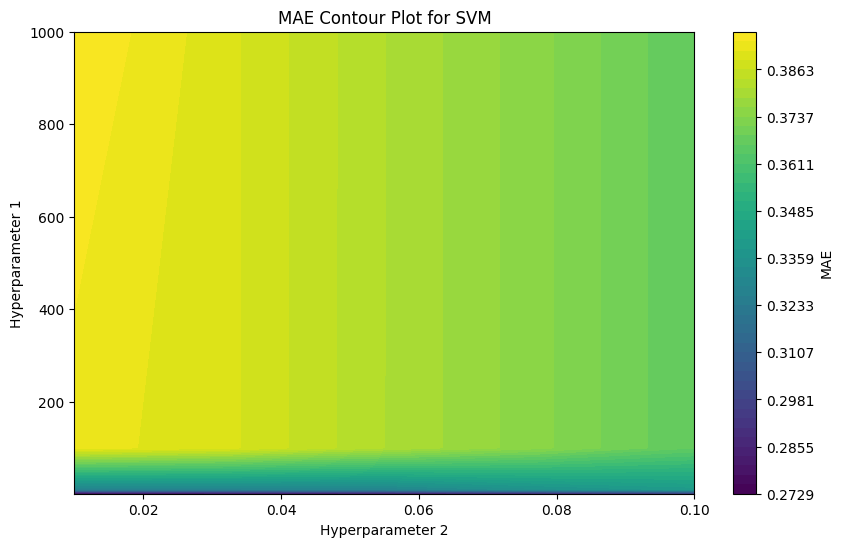

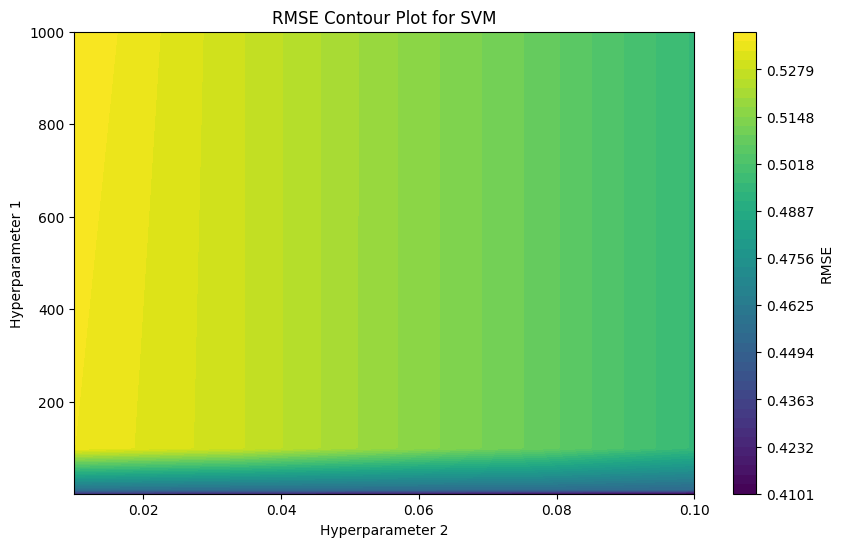

Generating contour plots for Linear Regression...


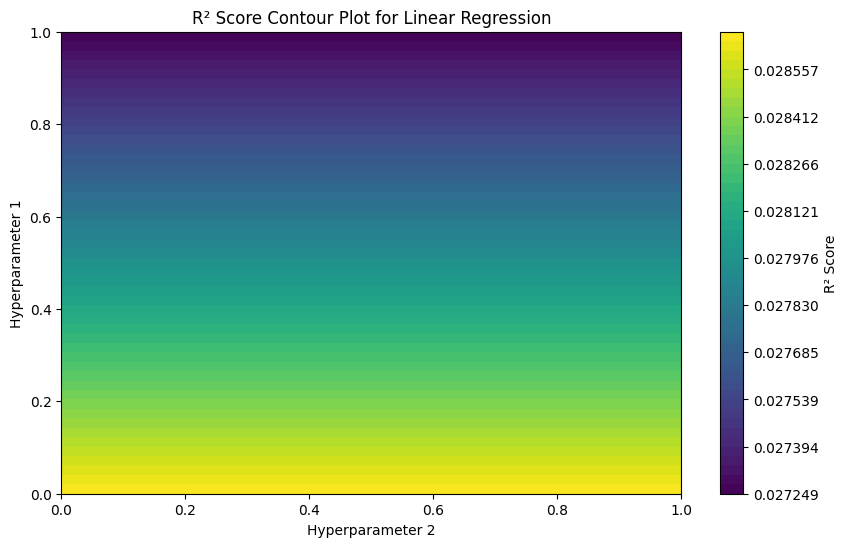

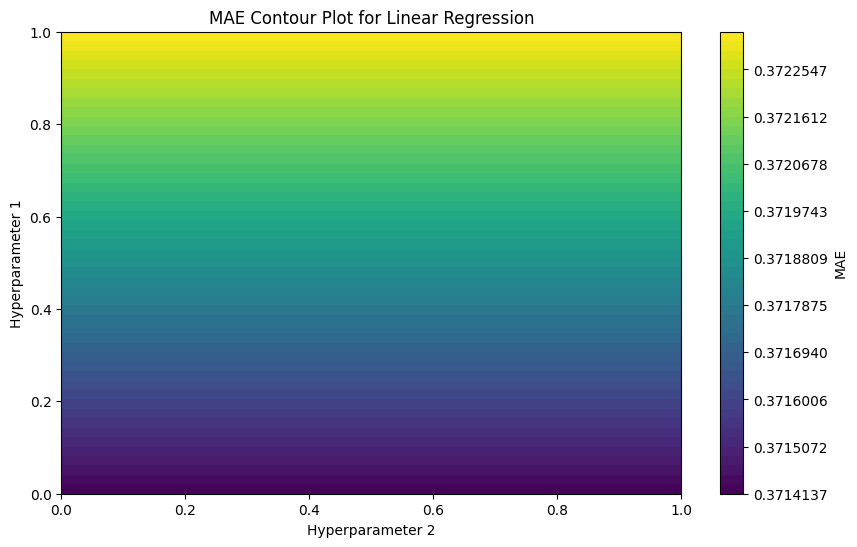

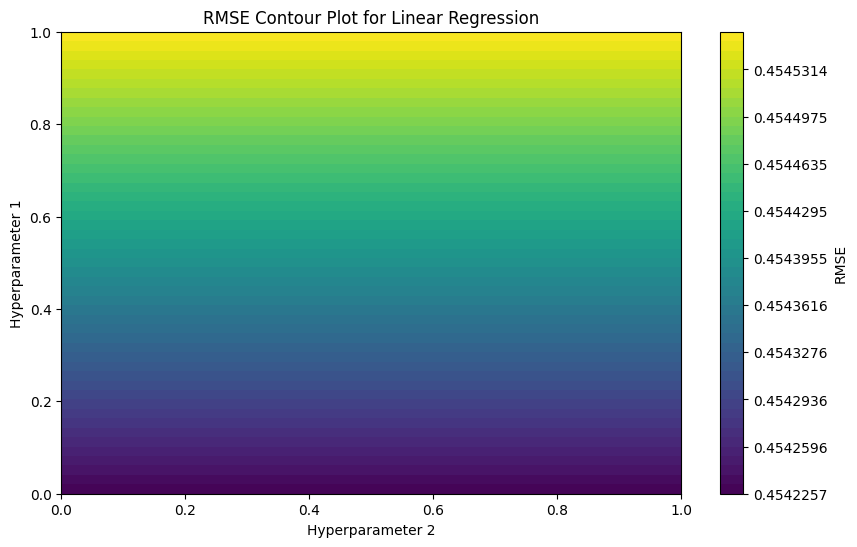

In [262]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR  # Import SVR for Support Vector Regression
from sklearn.linear_model import LinearRegression

# Specify the target column and features
target_column = "recurrence status_no-recurrence-events"
y = df[target_column]
X = df.drop(columns=[target_column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their hyperparameter ranges for contour plots
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "SVM": SVR(),  # Use SVR instead of Naive Bayes
    "Linear Regression": LinearRegression()
}

# Hyperparameter ranges for contour plotting
param_spaces = {
    "Random Forest": {
        'n_estimators': np.arange(50, 301, 50),  # 50 to 300 trees
        'max_depth': np.arange(5, 51, 5)  # Depth from 5 to 50
    },
    "Gradient Boosting": {
        'n_estimators': np.arange(50, 301, 50),
        'learning_rate': np.linspace(0.01, 0.2, 5),
        'max_depth': np.arange(3, 11, 1)
    },
    "K-Nearest Neighbors": {
        'n_neighbors': np.arange(3, 21, 1),
        'weights': ['uniform', 'distance']
    },
    "SVM": {  # SVM hyperparameters for SVR
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': np.logspace(0, 3, 4),  # Regularization parameter (log scale)
        'epsilon': np.linspace(0.01, 0.1, 5)  # Epsilon for regression error
    },
    "Linear Regression": {
        'fit_intercept': [True, False]
    }
}

# Create contour plots for each model and metric
metrics = {
    "R² Score": r2_score,
    "MAE": mean_absolute_error,
    "RMSE": lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))
}

for model_name, model in models.items():
    print(f"Generating contour plots for {model_name}...")

    # Adjust parameter ranges for each model
    if model_name in ['Random Forest', 'Gradient Boosting']:
        param_1_values = param_spaces[model_name]['n_estimators']
        param_2_values = param_spaces[model_name]['max_depth']
    elif model_name == 'K-Nearest Neighbors':
        param_1_values = param_spaces[model_name]['n_neighbors']
        param_2_values = param_spaces[model_name]['weights']
    elif model_name == 'SVM':  # Adjust for SVM (SVR)
        param_1_values = param_spaces[model_name]['C']
        param_2_values = param_spaces[model_name]['epsilon']
    elif model_name == 'Linear Regression':
        param_1_values = param_spaces[model_name]['fit_intercept']
        param_2_values = param_1_values
    elif model_name == 'Gradient Boosting':  # Adjust for Gradient Boosting
        param_1_values = param_spaces[model_name]['n_estimators']
        param_2_values = param_spaces[model_name]['learning_rate']

    # Initialize score arrays for each metric
    scores = {metric: np.zeros((len(param_1_values), len(param_2_values))) for metric in metrics}

    # Loop over each combination of hyperparameters
    for i, param_1 in enumerate(param_1_values):
        for j, param_2 in enumerate(param_2_values):
            try:
                # Set the hyperparameters for the model
                if model_name in ['Random Forest', 'Gradient Boosting']:
                    model.set_params(n_estimators=param_1, max_depth=param_2)
                elif model_name == 'K-Nearest Neighbors':
                    model.set_params(n_neighbors=param_1, weights=param_2)
                elif model_name == 'SVM':  # Set SVM parameters (C and epsilon)
                    model.set_params(C=param_1, epsilon=param_2)
                elif model_name == 'Linear Regression':
                    model.set_params(fit_intercept=param_1)
                elif model_name == 'Gradient Boosting':  # Set parameters for Gradient Boosting
                    model.set_params(n_estimators=param_1, learning_rate=param_2)

                # Fit the model and make predictions
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                # Compute metrics
                for metric_name, metric_func in metrics.items():
                    scores[metric_name][i, j] = metric_func(y_test, y_pred)

            except Exception as e:
                print(f"Error for {model_name} with params {param_1}, {param_2}: {e}")

    # Generate contour plots for each metric
    for metric_name, metric_scores in scores.items():
        plt.figure(figsize=(10, 6))
        if model_name == 'K-Nearest Neighbors':  # Handle categorical 'weights'
            param_2_values_idx = np.arange(len(param_2_values))
            X_grid, Y_grid = np.meshgrid(param_2_values_idx, param_1_values)
            plt.contourf(X_grid, Y_grid, metric_scores, cmap='viridis', levels=np.linspace(metric_scores.min(), metric_scores.max(), 50))
            plt.xticks(param_2_values_idx, param_2_values)
        else:
            X_grid, Y_grid = np.meshgrid(param_2_values, param_1_values)
            plt.contourf(X_grid, Y_grid, metric_scores, cmap='viridis', levels=np.linspace(metric_scores.min(), metric_scores.max(), 50))

        plt.colorbar(label=metric_name)
        plt.title(f'{metric_name} Contour Plot for {model_name}')
        plt.xlabel('Hyperparameter 2')
        plt.ylabel('Hyperparameter 1')
        plt.show()


Recalculating R^2, RSME,and MAE based on hyperparamaterization

In [263]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Specify the target column and features
target_column = "recurrence status_no-recurrence-events"  # Replace with your actual target column
y = df[target_column]
X = df.drop(columns=[target_column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    "Support Vector Machine": SVR(C=1.0, kernel='rbf'),
    "Linear Regression": LinearRegression()
}

# Initialize an empty list to store the results
results = []

# Initialize variables to track the best model based on RMSE
best_rmse = float('inf')
best_model = None
best_model_name = None

# Evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Store the results
    results.append({
        "Model": model_name,
        "R²": r2,
        "RMSE": rmse,
        "MAE": mae
    })

    # Save the best model based on RMSE for the test dataset
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        best_model_name = model_name

    print(f"{model_name} RMSE on Test Data: {rmse:.4f}")

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"\nBest model: {best_model_name} with RMSE: {best_rmse:.4f}")

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Display the results sorted by R² in descending order
results_df = results_df.sort_values(by="R²", ascending=False)
print("\nModel Performance Metrics:")
print(results_df)

# Select the top 3 models based on R²
top_3_models = results_df.head(3)

print("\nTop 3 models based on R²:")
for idx, row in top_3_models.iterrows():
    print(f"Model: {row['Model']}")
    print(f"R²: {row['R²']:.4f}, RMSE: {row['RMSE']:.4f}, MAE: {row['MAE']:.4f}\n")




Training and evaluating Random Forest...
Random Forest RMSE on Test Data: 0.4167
Training and evaluating Gradient Boosting...
Gradient Boosting RMSE on Test Data: 0.4261
Training and evaluating K-Nearest Neighbors...
K-Nearest Neighbors RMSE on Test Data: 0.4536
Training and evaluating Support Vector Machine...
Support Vector Machine RMSE on Test Data: 0.4101
Training and evaluating Linear Regression...
Linear Regression RMSE on Test Data: 0.4546

Best model: Support Vector Machine with RMSE: 0.4101

Model Performance Metrics:
                    Model        R²      RMSE       MAE
3  Support Vector Machine  0.208239  0.410097  0.291475
0           Random Forest  0.182712  0.416655  0.333464
1       Gradient Boosting  0.145431  0.426052  0.340306
2     K-Nearest Neighbors  0.031529  0.453557  0.334694
4       Linear Regression  0.027249  0.454559  0.372329

Top 3 models based on R²:
Model: Support Vector Machine
R²: 0.2082, RMSE: 0.4101, MAE: 0.2915

Model: Random Forest
R²: 0.1827, RM

# Complete if R2 values are bad

Feature engineering

In [264]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

### Step 1: Handle Missing Values ###
# Impute missing numeric values with the median
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy='median')
X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

### Step 2: Scale Numeric Features ###
# Standardize numeric features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

### Step 3: Create Interaction Features ###
# Create interaction terms for top features
X['Interaction_Term'] = X[numeric_features[0]] * X[numeric_features[1]]  # Example interaction term

### Step 4: Feature Selection ###
# Select top 10 features using feature importance or statistical tests
selector = SelectKBest(score_func=f_classif, k=10)  # Using ANOVA F-test for classification
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### Step 5: Train and Validate Using SVM ###
# Train an SVM model
model = SVC(kernel='rbf', random_state=42)  # Default is 'rbf' kernel; you can change based on the problem
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Display results
print(f"Training Score (Accuracy): {train_score:.4f}")
print(f"Testing Score (Accuracy): {test_score:.4f}")


Selected Features: Index(['degree of malignancy', 'invasive nodes range_2024-10-14 00:00:00',
       'invasive nodes range_30-34', 'tumor size range_2024-03-05 00:00:00',
       'tumor size range_2024-06-08 00:00:00',
       'tumor size range_2024-09-11 00:00:00', 'tumor size range_0-2',
       'node capsule status_no', 'irradiation status_no', 'Interaction_Term'],
      dtype='object')
Training Score (Accuracy): 0.8103
Testing Score (Accuracy): 0.7347


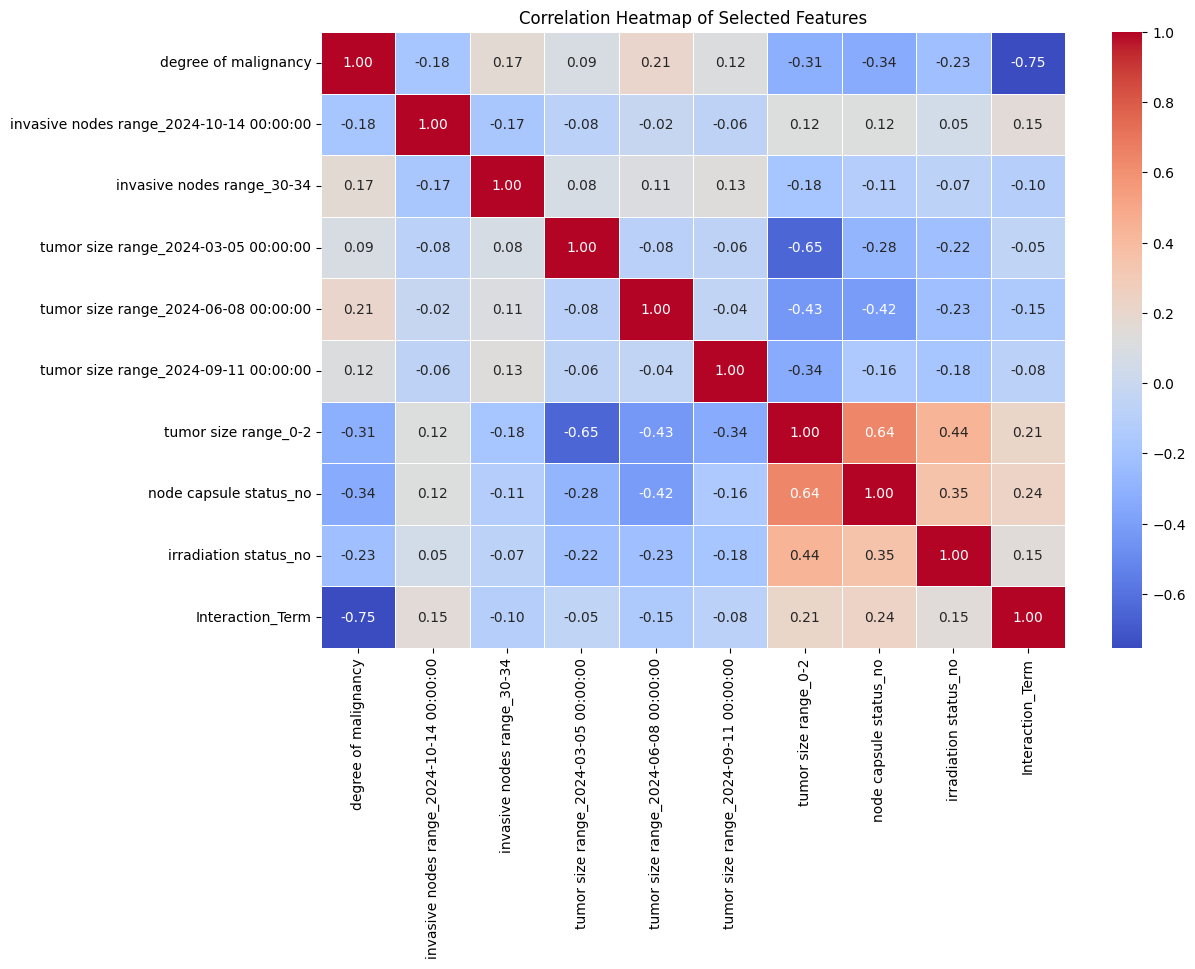

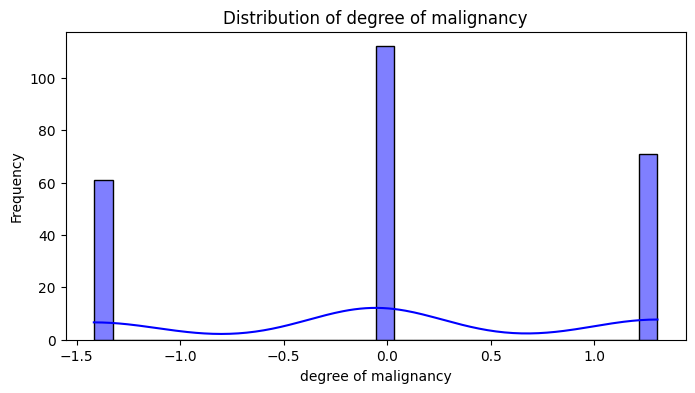

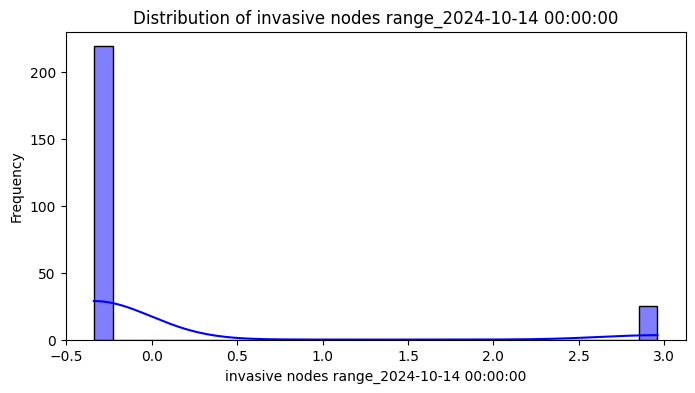

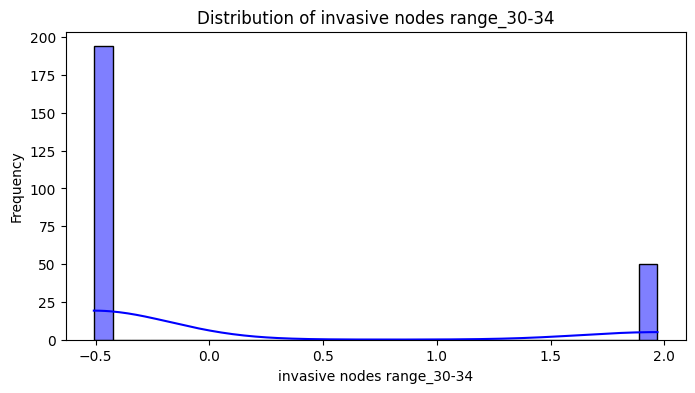

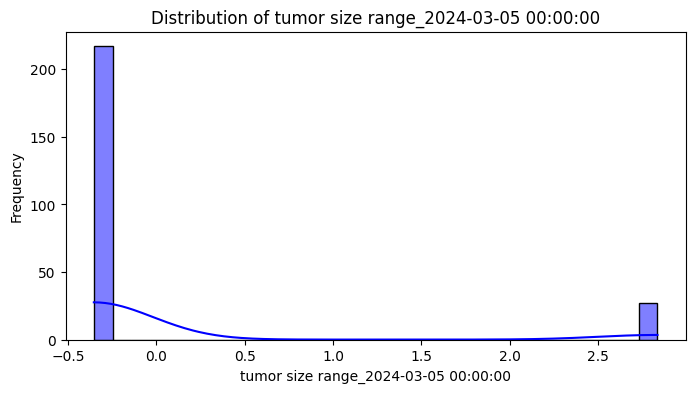

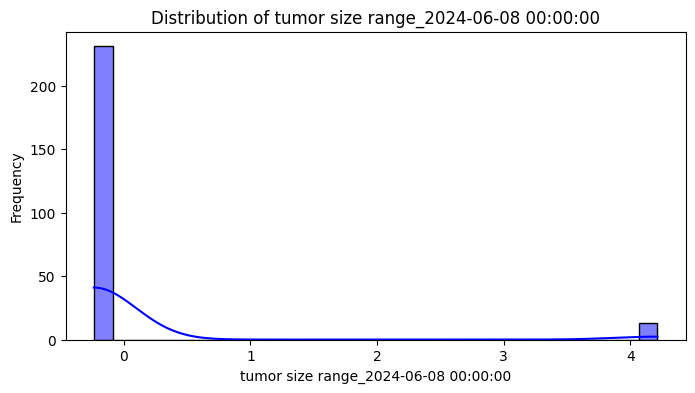

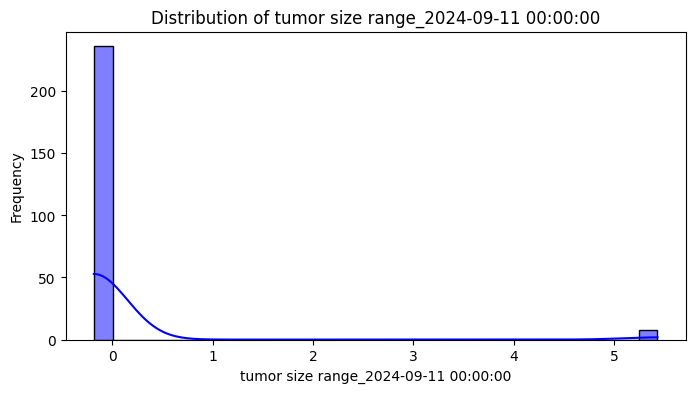

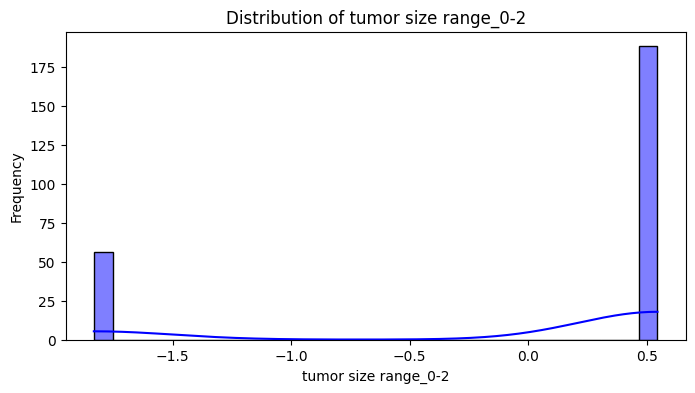

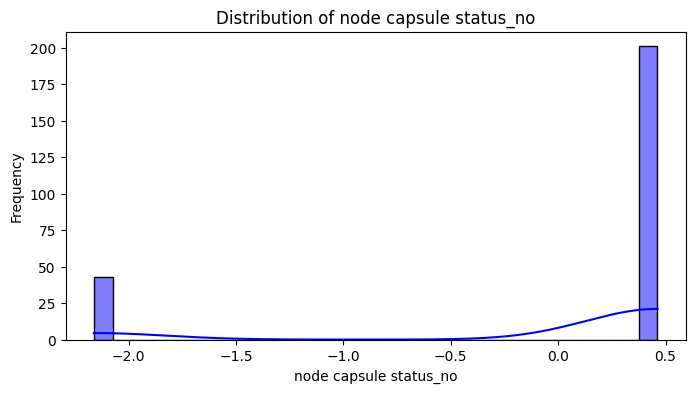

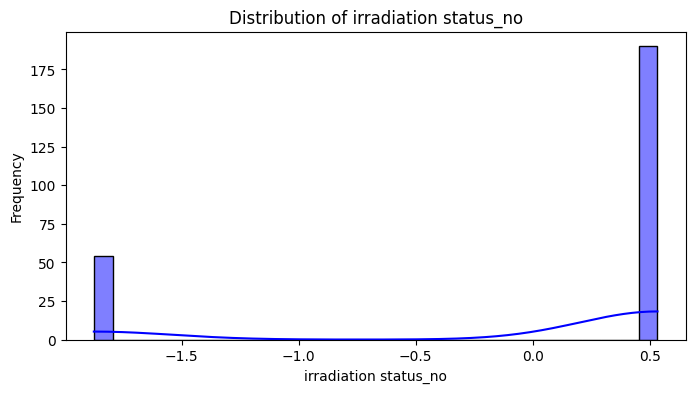

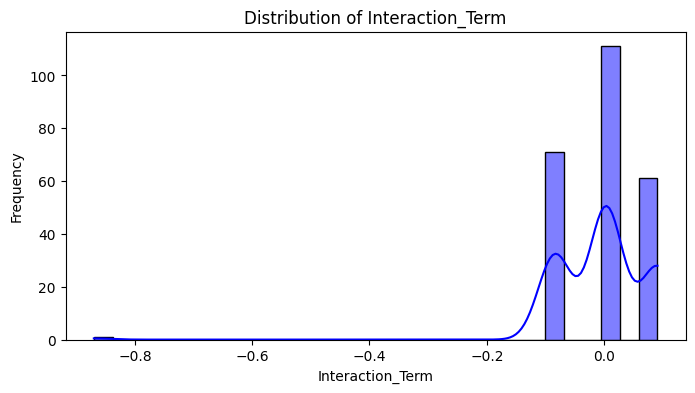

<ipython-input-265-9b53e48aa34a>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_features, y=feature_importances, palette="viridis")


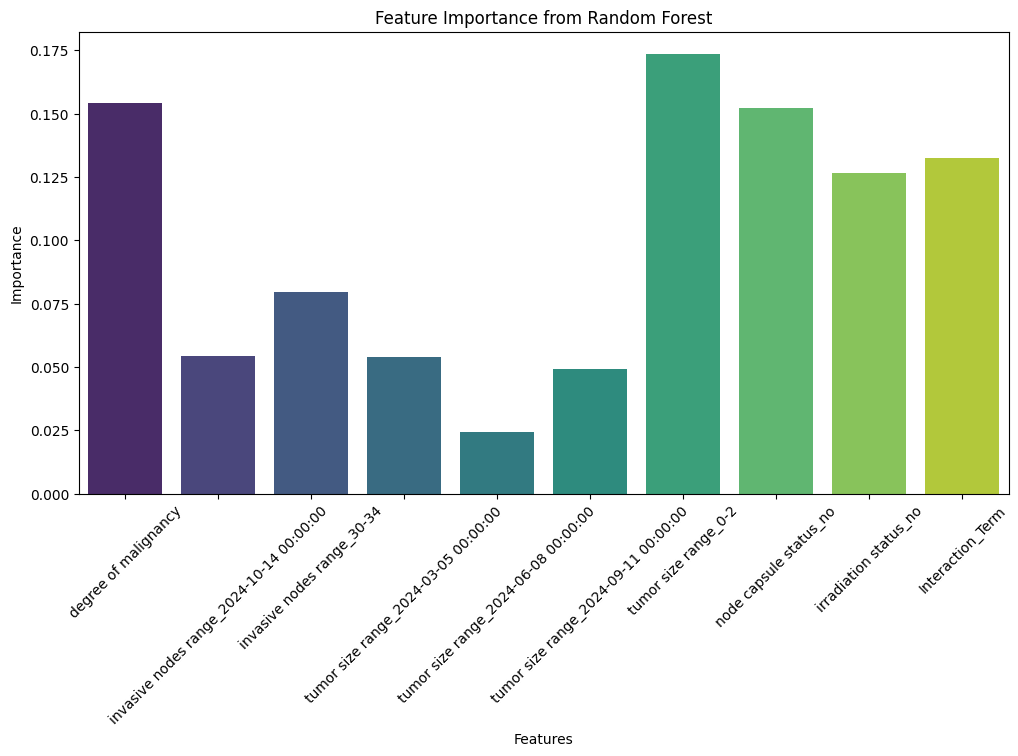

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assume X_selected, y, and selected_features are obtained from the previous feature engineering steps

# Create a DataFrame for the selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

### Visualization 1: Correlation Heatmap ###
plt.figure(figsize=(12, 8))
correlation_matrix = X_selected_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

### Visualization 2: Feature Distributions ###
# Plot distribution of selected numeric features
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_selected_df[feature], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

### Visualization 3: Feature Importance ###
# If using a model that provides feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_selected, y)
feature_importances = model.feature_importances_

# Create a bar plot for feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_features, y=feature_importances, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

### Visualization 4: Pairplot of Selected Features ###
# Pairplot to show relationships between features
if len(selected_features) <= 5:  # Pairplot works well for a small number of features
    pairplot_data = X_selected_df.copy()
    pairplot_data['Target'] = y.reset_index(drop=True)  # Add the target column for color coding
    sns.pairplot(pairplot_data, hue='Target', diag_kind='kde', palette='Set1')
    plt.suptitle("Pairplot of Selected Features and Target", y=1.02)
    plt.show()


# Interpretable Analysis

Partial dependence plot

In [ ]:
print(X.columns)  # Lists all valid column names


Index(['degree of malignancy', 'age range_20-29', 'age range_30-39',
       'age range_40-49', 'age range_50-59', 'age range_60-69',
       'age range_70-79', 'menopausal status_ge40', 'menopausal status_lt40',
       'invasive nodes range_2024-05-09 00:00:00',
       'invasive nodes range_2024-10-14 00:00:00', 'invasive nodes range_0-4',
       'invasive nodes range_15-19', 'invasive nodes range_20-24',
       'invasive nodes range_25-29', 'invasive nodes range_30-34',
       'invasive nodes range_35-39', 'invasive nodes range_40-44',
       'invasive nodes range_45-49', 'invasive nodes range_50-54',
       'tumor size range_2024-03-05 00:00:00',
       'tumor size range_2024-06-08 00:00:00',
       'tumor size range_2024-09-11 00:00:00',
       'tumor size range_2024-12-14 00:00:00', 'tumor size range_0-2',
       'tumor size range_15-17', 'tumor size range_24-26',
       'node capsule status_no', 'breast side_left', 'breast quadrant_central',
       'breast quadrant_left_low', 'brea

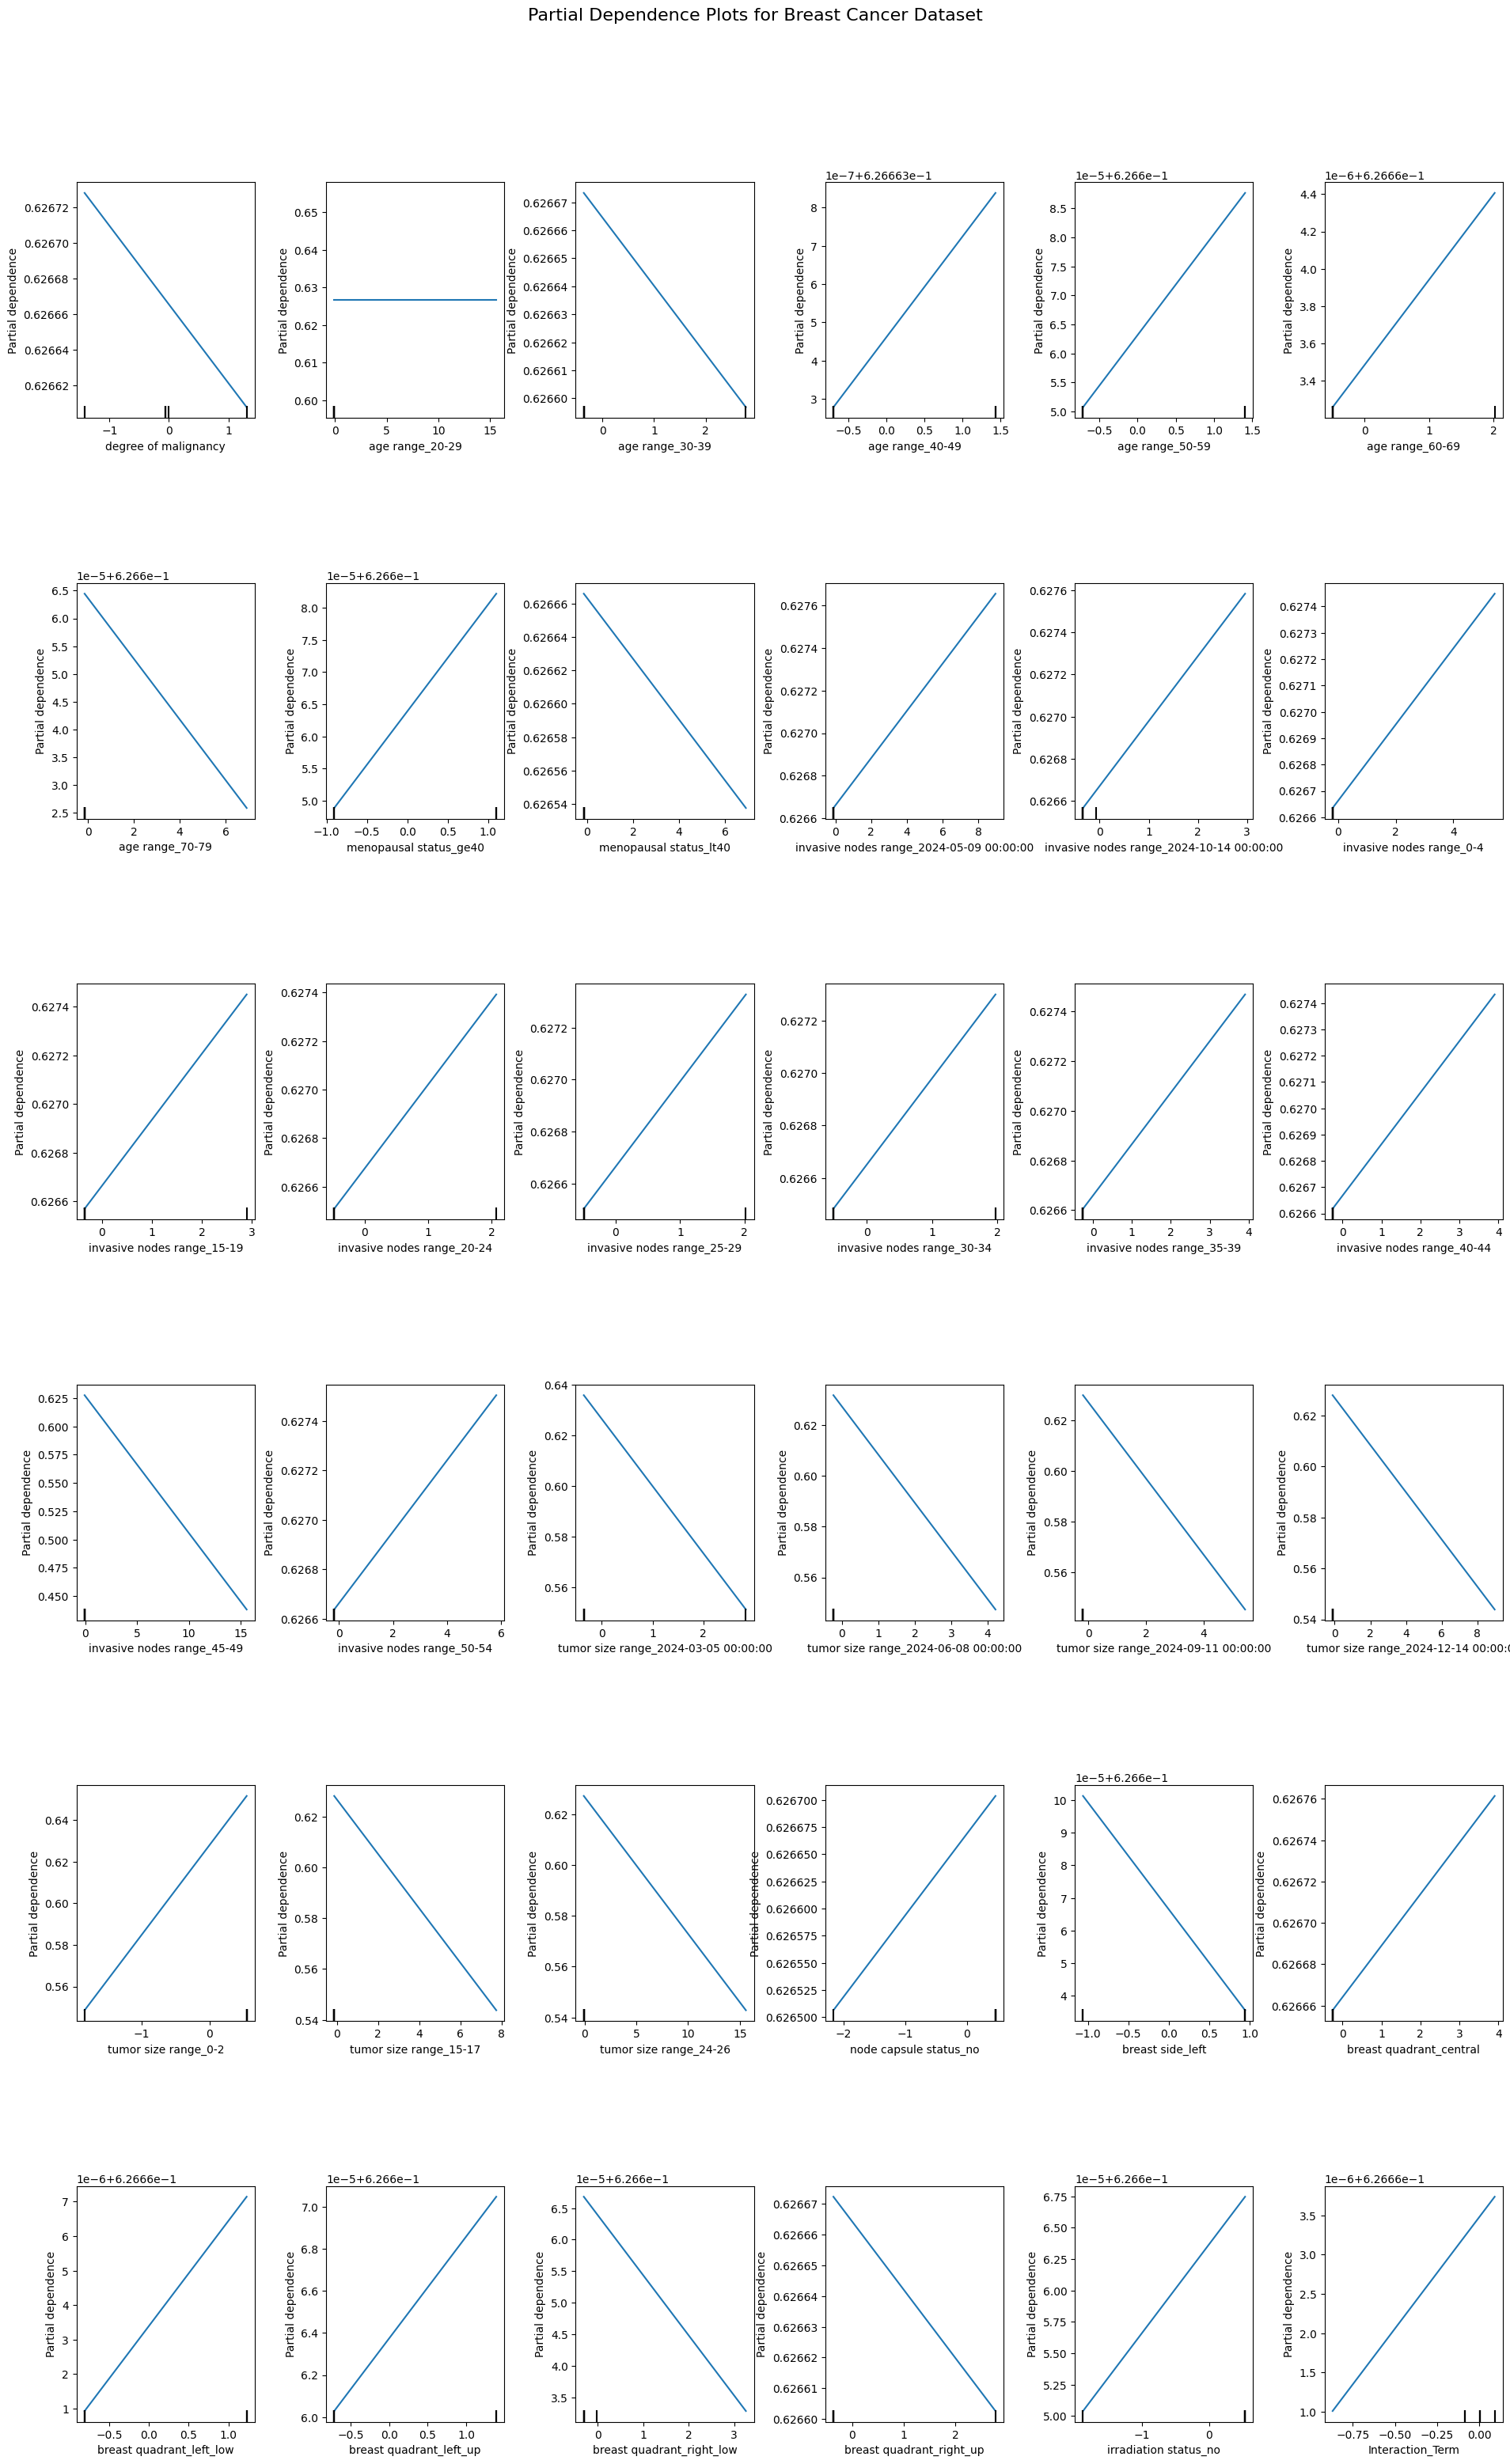

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

# Ensure feature names match X columns
feature_names = [
    'degree of malignancy', 'age range_20-29', 'age range_30-39',
    'age range_40-49', 'age range_50-59', 'age range_60-69',
    'age range_70-79', 'menopausal status_ge40', 'menopausal status_lt40',
    'invasive nodes range_2024-05-09 00:00:00',
    'invasive nodes range_2024-10-14 00:00:00', 'invasive nodes range_0-4',
    'invasive nodes range_15-19', 'invasive nodes range_20-24',
    'invasive nodes range_25-29', 'invasive nodes range_30-34',
    'invasive nodes range_35-39', 'invasive nodes range_40-44',
    'invasive nodes range_45-49', 'invasive nodes range_50-54',
    'tumor size range_2024-03-05 00:00:00',
    'tumor size range_2024-06-08 00:00:00',
    'tumor size range_2024-09-11 00:00:00',
    'tumor size range_2024-12-14 00:00:00', 'tumor size range_0-2',
    'tumor size range_15-17', 'tumor size range_24-26',
    'node capsule status_no', 'breast side_left', 'breast quadrant_central',
    'breast quadrant_left_low', 'breast quadrant_left_up',
    'breast quadrant_right_low', 'breast quadrant_right_up',
    'irradiation status_no', 'Interaction_Term'
]

# Verify the dataset columns align with the feature names
assert set(feature_names).issubset(X.columns), "Mismatch between dataset columns and feature names!"

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
model = SVC(kernel='linear', probability=True, random_state=42)  # Use a linear kernel for interpretability
model.fit(X_train, y_train)

# Divide the features into smaller groups for better readability
features_per_plot = 6  # Number of features per row
num_features = len(feature_names)
num_rows = (num_features // features_per_plot) + (1 if num_features % features_per_plot != 0 else 0)

# Set up the figure for the PDPs grid
fig, axes = plt.subplots(num_rows, features_per_plot, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten axes array for easy access

# Plot each feature in its respective subplot
for idx, feature in enumerate(feature_names):
    # Check if there are extra axes (in case of fewer features than axes)
    if idx >= len(axes):
        break
    ax = axes[idx]
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_train,
        features=[feature],
        grid_resolution=50,  # Number of grid points
        kind='average',  # Average effect
        ax=ax  # Specific subplot axis
    )

    ax.tick_params(axis='both', labelsize=8)  # Reduce font size of tick labels
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Make grid lines thinner and dashed

# Adjust layout to avoid overlap
plt.tight_layout(pad=4.0)  # Increase padding between plots to prevent overlap
plt.suptitle("Partial Dependence Plots for Breast Cancer Dataset", fontsize=16, y=1.05)
plt.subplots_adjust(hspace=0.7, wspace=0.4)  # Add space between rows and columns to avoid overlap
plt.show()


Bee swarm plot

<ipython-input-267-0466dfe00c95>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-267-0466dfe00c95>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 26

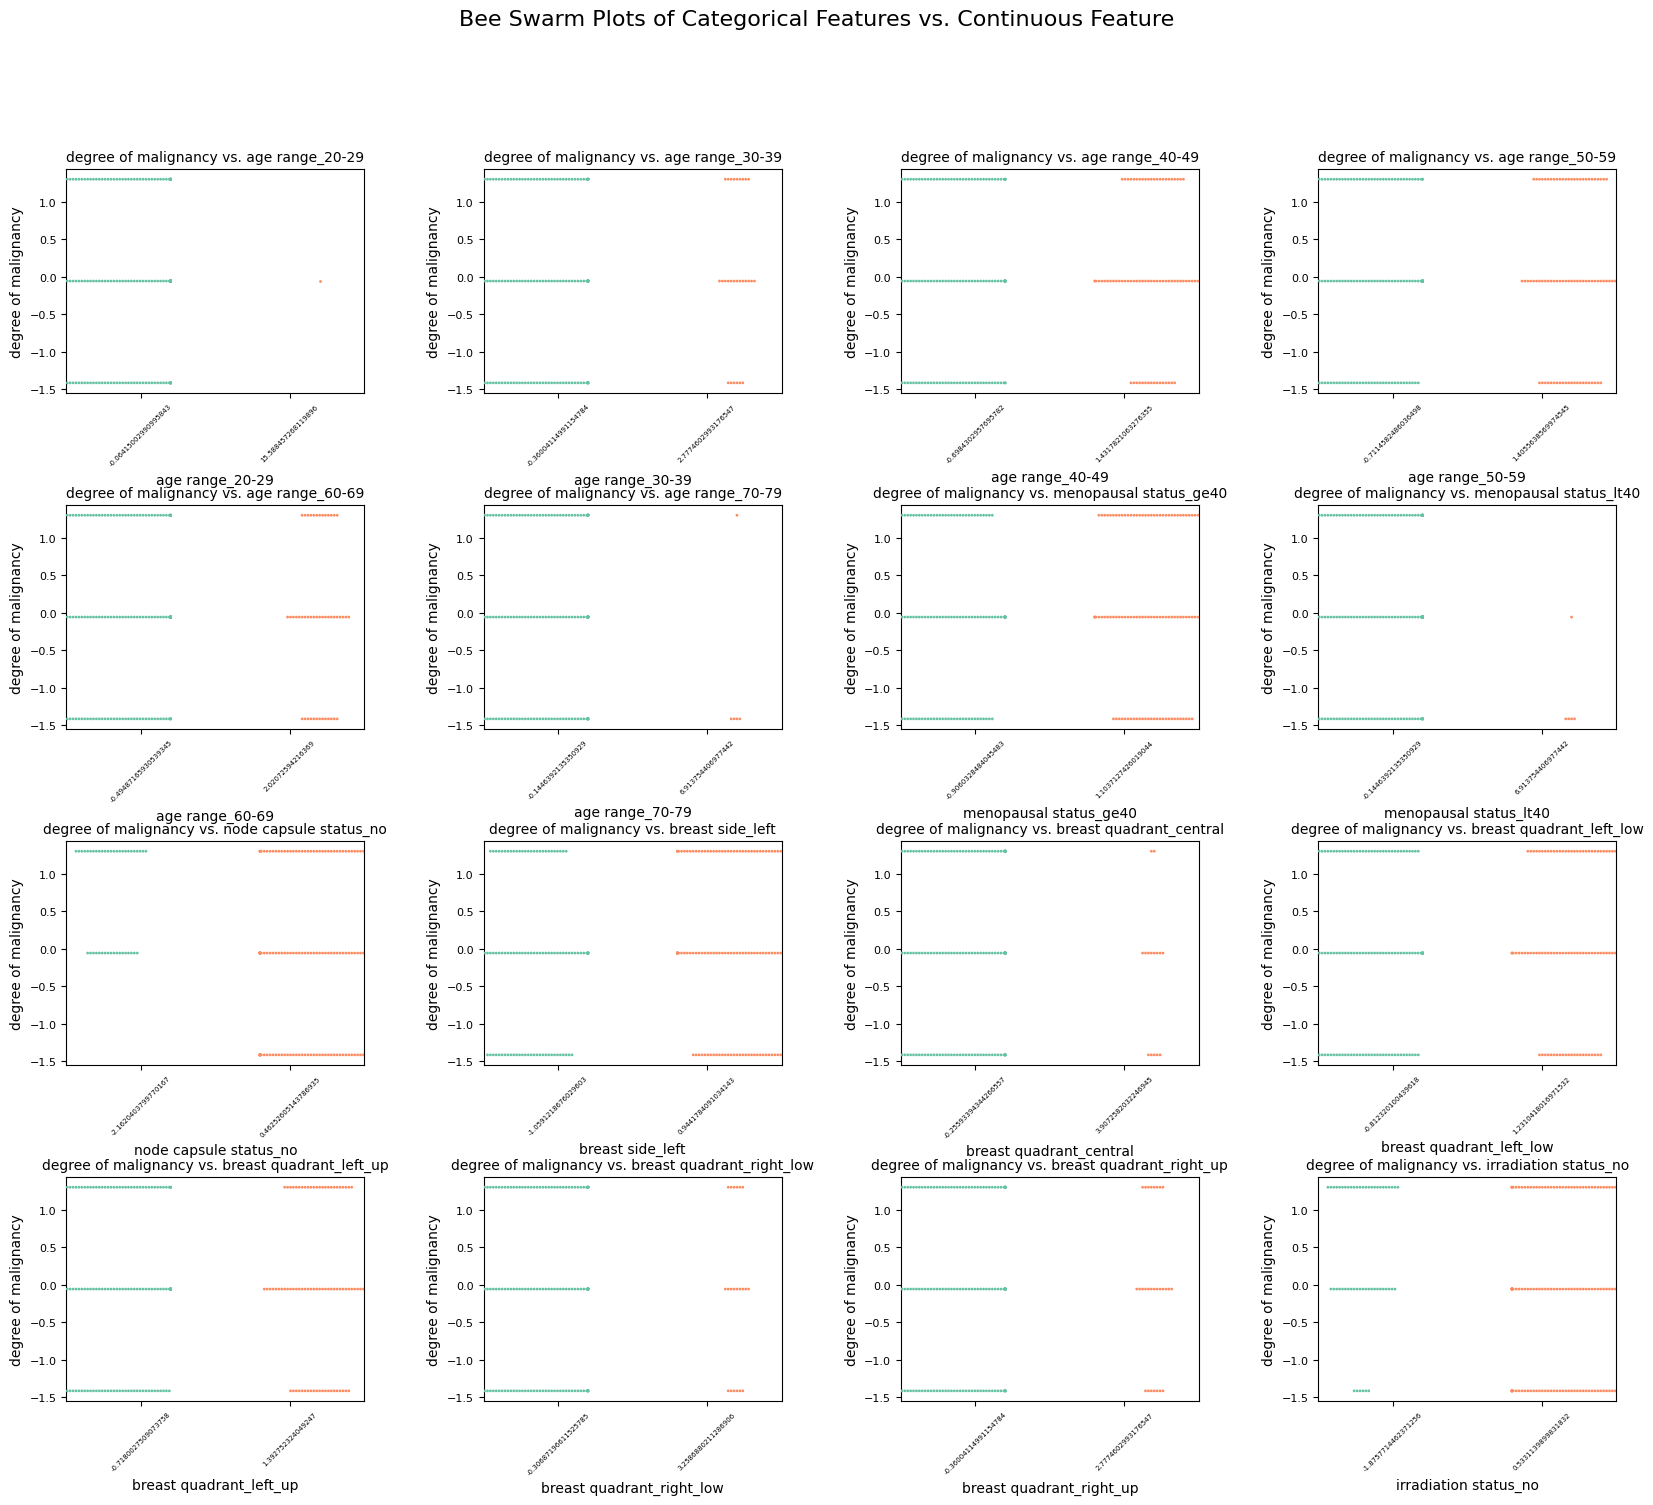

In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Example of categorical features and a continuous feature
categorical_features = [
    'age range_20-29', 'age range_30-39', 'age range_40-49',
    'age range_50-59', 'age range_60-69', 'age range_70-79',
    'menopausal status_ge40', 'menopausal status_lt40', 'node capsule status_no',
    'breast side_left', 'breast quadrant_central', 'breast quadrant_left_low',
    'breast quadrant_left_up', 'breast quadrant_right_low', 'breast quadrant_right_up',
    'irradiation status_no'
]

# Continuous feature to plot (for example 'degree of malignancy')
continuous_feature = 'degree of malignancy'

# Create a figure and GridSpec object for better layout control
num_features = len(categorical_features)
ncols = 4  # Number of columns for the layout
nrows = -(-num_features // ncols)  # Calculate rows needed (ceiling division)

fig = plt.figure(figsize=(20, nrows * 4))  # Adjust height based on rows
gs = GridSpec(nrows, ncols, figure=fig, hspace=0.5, wspace=0.4)  # Control space between plots

# Create a bee swarm plot for each categorical feature
for i, feature in enumerate(categorical_features):
    row, col = divmod(i, ncols)  # Calculate grid position
    ax = fig.add_subplot(gs[row, col])  # Add subplot to the grid
    sns.swarmplot(
        x=feature,
        y=continuous_feature,
        data=X,
        palette='Set2',
        size=2,  # Reduce marker size to minimize overlap
        dodge=True  # Adds separation to categorical levels
    )
    ax.set_title(f"{continuous_feature} vs. {feature}", fontsize=10)
    ax.tick_params(axis='x', labelrotation=45, labelsize=5)  # Rotate and adjust x-axis labels
    ax.tick_params(axis='y', labelsize=8)  # Adjust y-axis label size

# Add a main title
fig.suptitle("Bee Swarm Plots of Categorical Features vs. Continuous Feature", fontsize=16)
plt.show()
